### Model for cluster 3 classification

#### Importing necessary libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
dataset=pd.read_csv('output/predicted_cluster_3.csv')
dataset.head()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
0                   0.482055             0.508468           0.350032   
1                   0.259963             0.315217           0.230355   
2                   0.511800             0.487109           0.223895   
3                   0.342298             0.375092           0.564973   
4                   0.512635             0.357413           0.320418   

   Total debt/Total net worth  Current Assets/Total Assets  \
0                8.939823e-09                     0.610929   
1                2.282069e-08                     0.702017   
2                9.730581e-09                     0.536150   
3                1.610728e-08                     0.555880   
4                1.770429e-08                     0.838793   

   Equity to Long-term Liability  Current Liabilities/Liability  \
0                       0.669761                       0.657496   
1                       0.671987                       0.642006   
2                       0.664512                       0.919703   
3                       0.675394                       0.727706   
4                       0.664512                       0.942003   

   Cash/Current Liability  Long-term Liability to Current Assets  \
0            3.734526e-10                           1.400728e-10   
1            1.408102e-10                           1.107799e-10   
2            1.750491e-10                           0.000000e+00   
3            5.256845e-10                           2.533740e-10   
4            1.962531e-10                           0.000000e+00   

   Long-term fund suitability ratio (A)  ...  Cash Flow to Liability  \
0                              0.327242  ...                0.599076   
1                              0.373924  ...                0.592446   
2                              0.982365  ...                0.598225   
3                              0.273098  ...                0.595730   
4                              0.535744  ...                0.595969   

   PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
0                                           0.650907                                                    
1                                           0.571646                                                    
2                                           0.687275                                                    
3                                           0.533653                                                    
4                                           0.676978                                                    

   Total expense/Assets  Total income/Total expense  Cash Flow to Equity  \
0              0.361045                    0.813156             0.537124   
1              0.072550                    0.785172             0.529624   
2              0.284440                    0.839838             0.536717   
3              0.611921                    0.770668             0.534960   
4              0.835574                    0.788459             0.535238   

   Cash Flow to Total Assets  No-credit Interval  Interest Expense Ratio  \
0                   0.634258            0.583154                0.577308   
1                   0.594149            0.561465                0.616326   
2                   0.630783            0.582811                0.577884   
3                   0.618267            0.582042                0.576174   
4                   0.619816            0.582334                0.577208   

   Index  Bankrupt?  
0      1          0  
1      4          0  
2     10          0  
3     12          0  
4     15          0  

[5 rows x 29 columns]

In [195]:
dataset.describe()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
count                1068.000000          1068.000000        1068.000000   
mean                    0.453243             0.389512           0.306224   
std                     0.186008             0.099610           0.190338   
min                     0.011524             0.120806           0.000423   
25%                     0.346763             0.314659           0.153827   
50%                     0.464367             0.378061           0.282120   
75%                     0.571692             0.458172           0.441755   
max                     0.988944             0.685069           0.955680   

       Total debt/Total net worth  Current Assets/Total Assets  \
count                1.068000e+03                  1068.000000   
mean                 2.108268e-08                     0.666590   
std                  3.647395e-08                     0.150185   
min                  4.489705e-09                     0.207214   
25%                  1.095910e-08                     0.562944   
50%                  1.586257e-08                     0.660677   
75%                  2.290450e-08                     0.782526   
max                  7.888879e-07                     1.000000   

       Equity to Long-term Liability  Current Liabilities/Liability  \
count                    1068.000000                    1068.000000   
mean                        0.671512                       0.792706   
std                         0.017961                       0.160229   
min                         0.209610                       0.311957   
25%                         0.664512                       0.678816   
50%                         0.668054                       0.805699   
75%                         0.675576                       0.942215   
max                         0.822932                       1.000000   

       Cash/Current Liability  Long-term Liability to Current Assets  \
count            1.068000e+03                           1.068000e+03   
mean             1.779026e-02                           1.777284e-02   
std              1.322503e-01                           1.321213e-01   
min              0.000000e+00                           0.000000e+00   
25%              1.025129e-10                           0.000000e+00   
50%              2.133069e-10                           8.091684e-11   
75%              3.943879e-10                           2.308381e-10   
max              1.000000e+00                           1.000000e+00   

       Long-term fund suitability ratio (A)  ...  Cash Flow to Liability  \
count                           1068.000000  ...             1068.000000   
mean                               0.474052  ...                0.594670   
std                                0.202116  ...                0.006900   
min                                0.000000  ...                0.507480   
25%                                0.326084  ...                0.593273   
50%                                0.410582  ...                0.595653   
75%                                0.572780  ...                0.597720   
max                                1.000000  ...                0.628081   

       PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
count                                        1068.000000                                                    
mean                                            0.586479                                                    
std                                             0.084066                                                    
min                                             0.000000                                                    
25%                                             0.563859                                                    
50%                                             0.601922                                           

In [196]:
dataset.dtypes

Quick Assets/Total Assets                                                                             float64
Equity to Liability                                                                                   float64
Cash/Total Assets                                                                                     float64
Total debt/Total net worth                                                                            float64
Current Assets/Total Assets                                                                           float64
Equity to Long-term Liability                                                                         float64
Current Liabilities/Liability                                                                         float64
Cash/Current Liability                                                                                float64
Long-term Liability to Current Assets                                                                 float64
Long-term 

In [197]:
dataset.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability', 'Cash/Total Assets',
       'Total debt/Total net worth', 'Current Assets/Total Assets',
       'Equity to Long-term Liability', 'Current Liabilities/Liability',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Long-term fund suitability ratio (A)', 'Quick Ratio',
       'Working capitcal Turnover Rate', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'Current Ratio',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Quick Assets/Current Liability', 'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'Cash Flow to Total Assets',
       'No-c

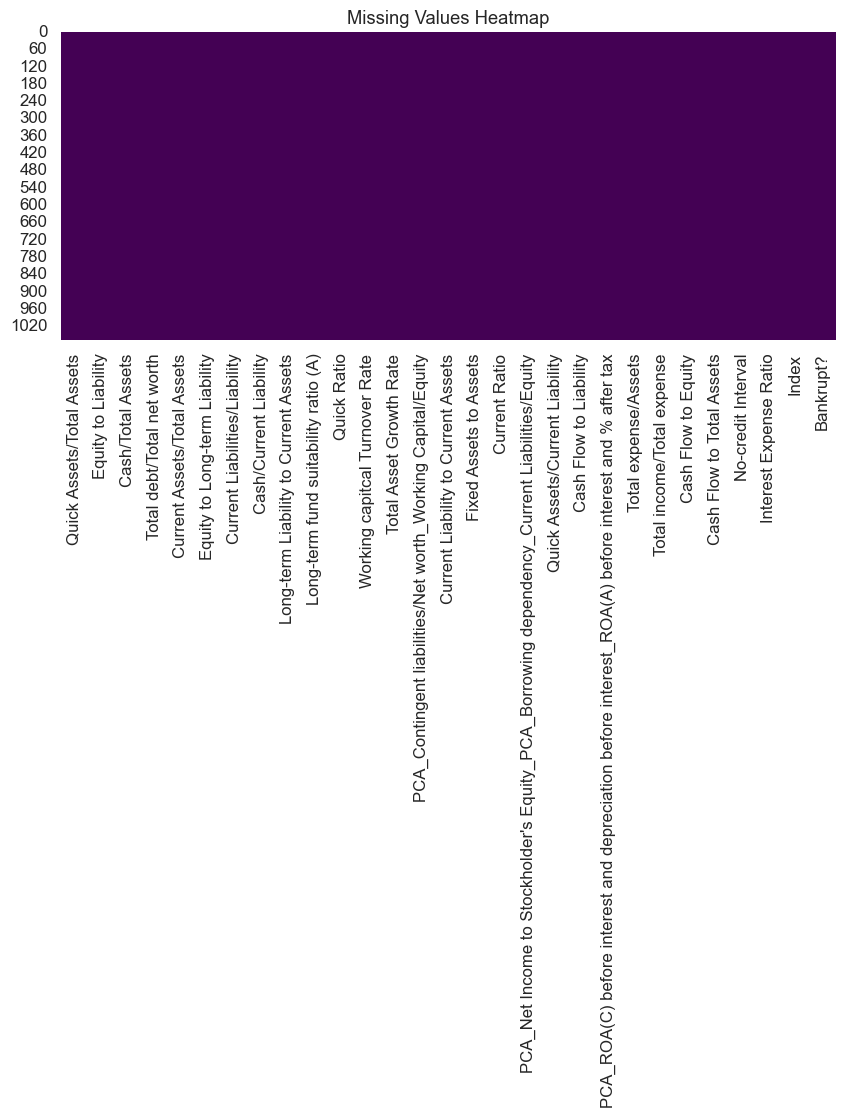

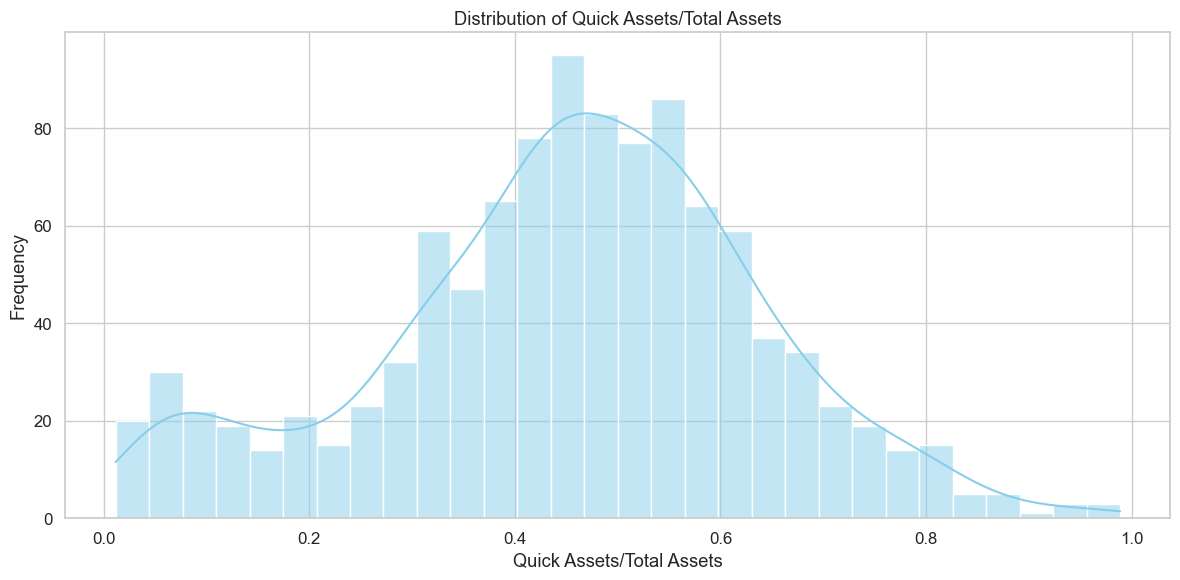

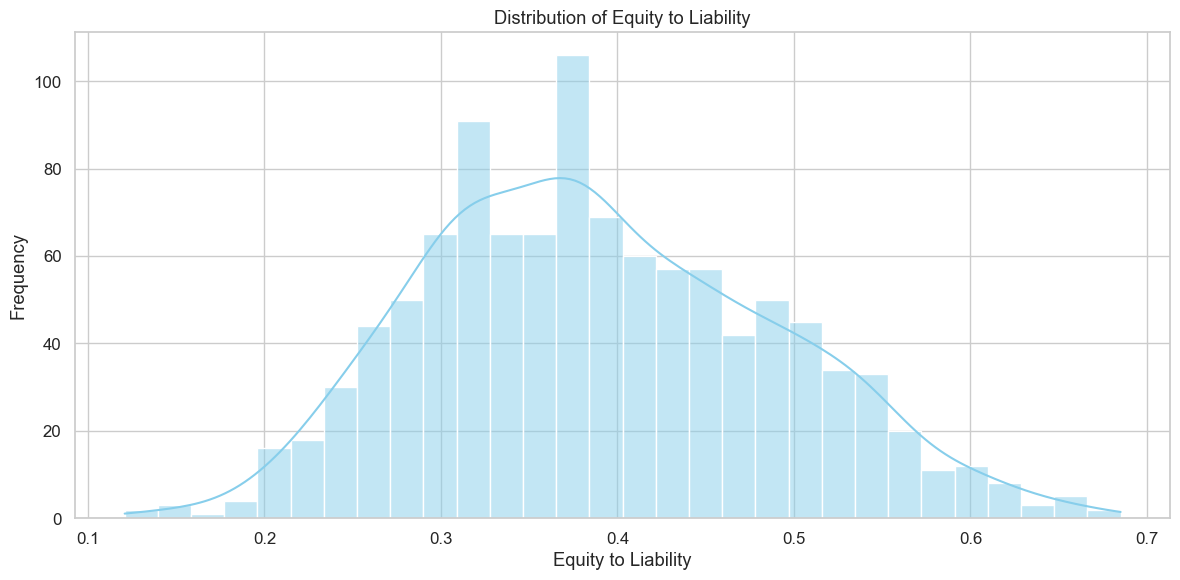

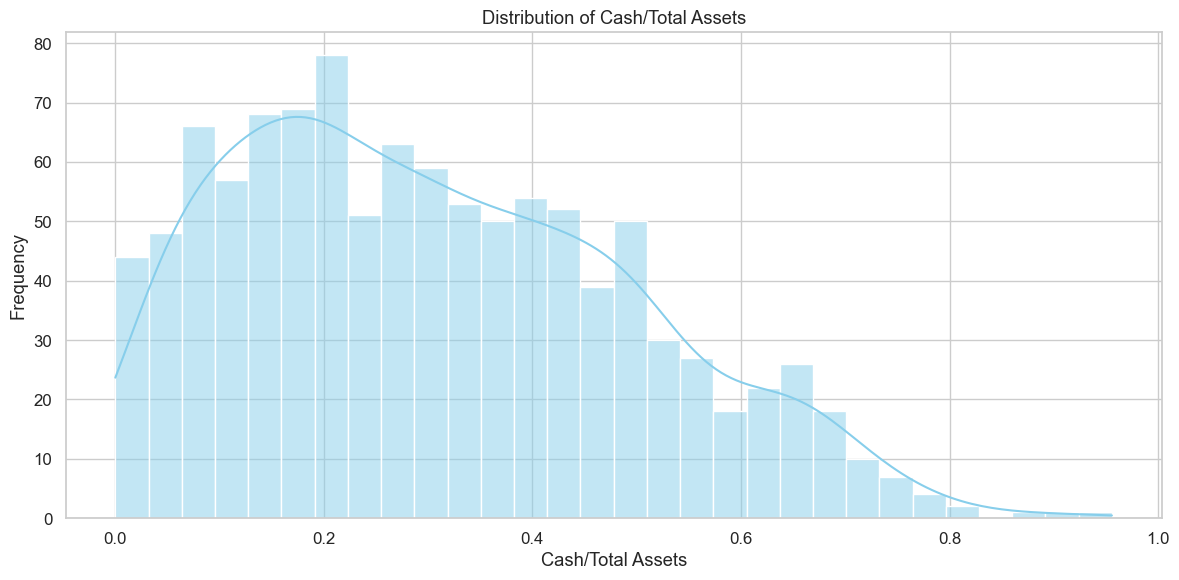

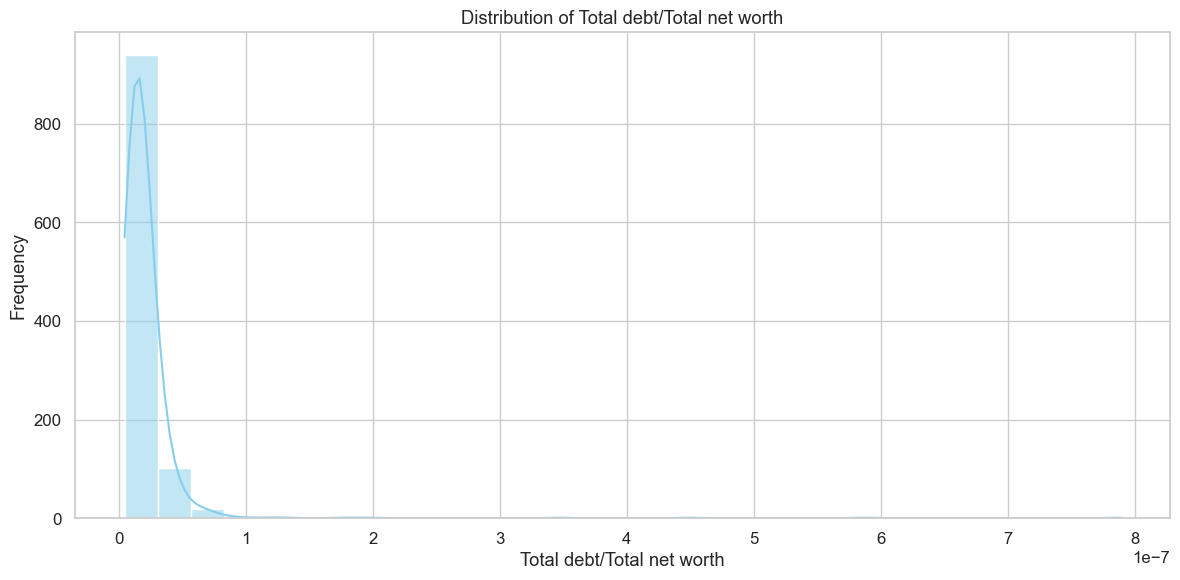

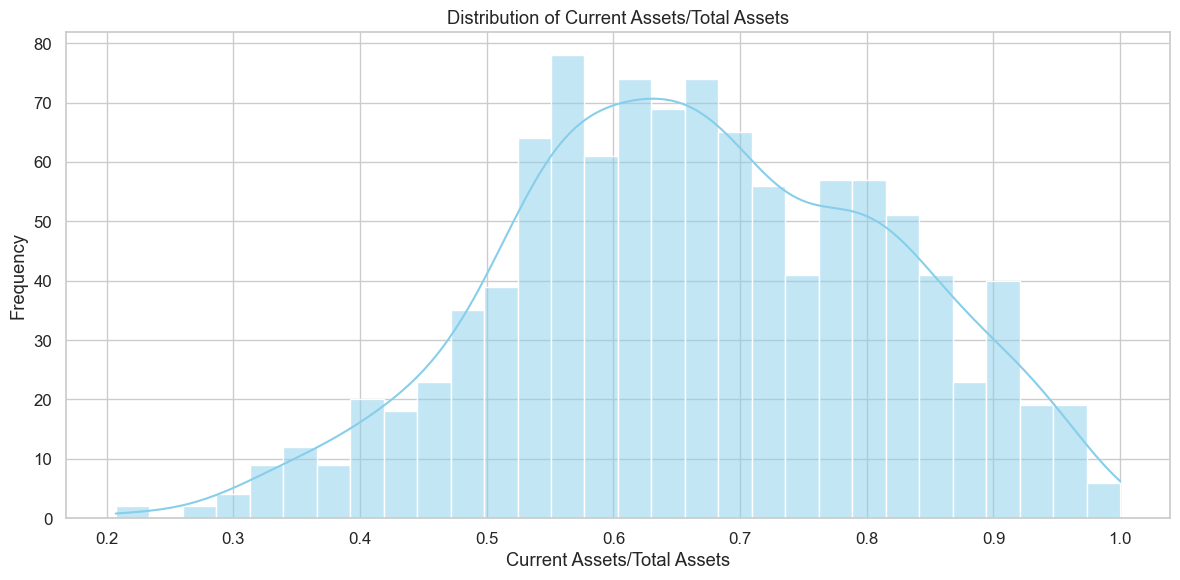

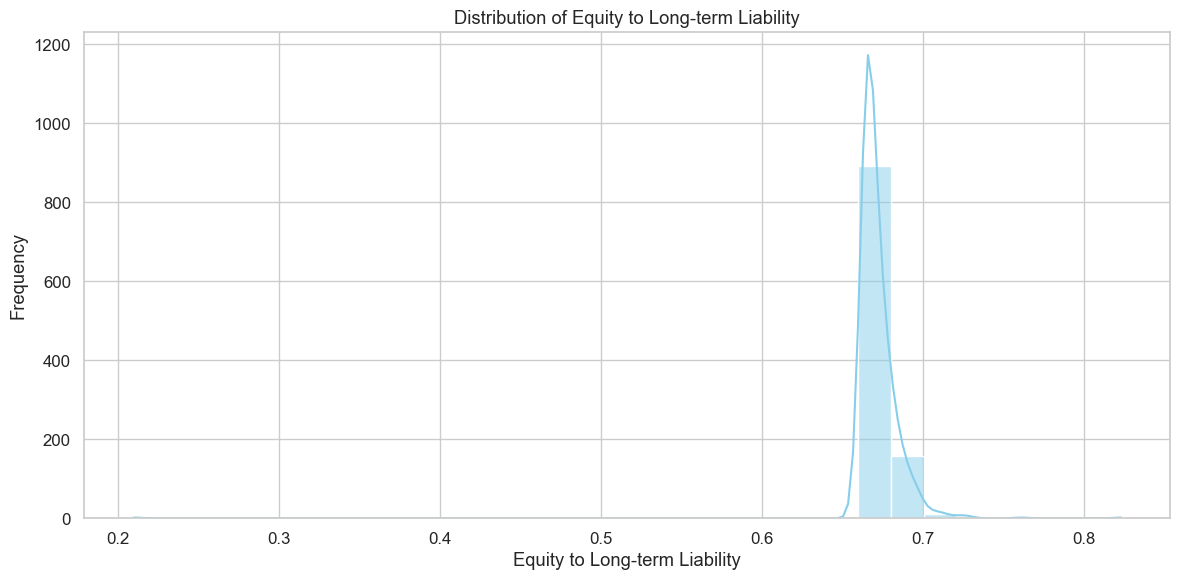

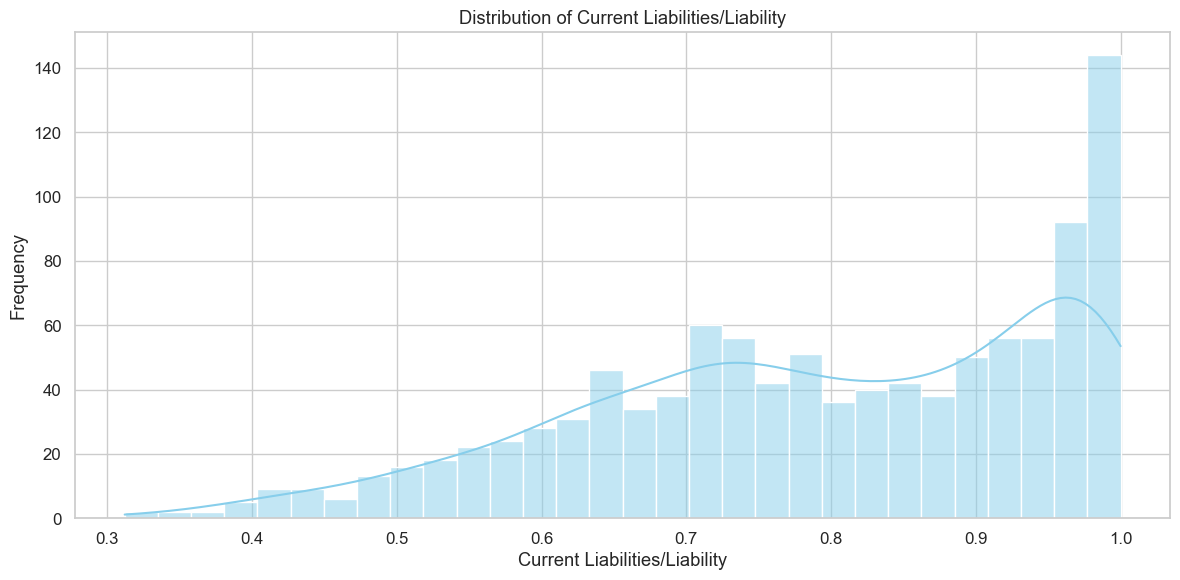

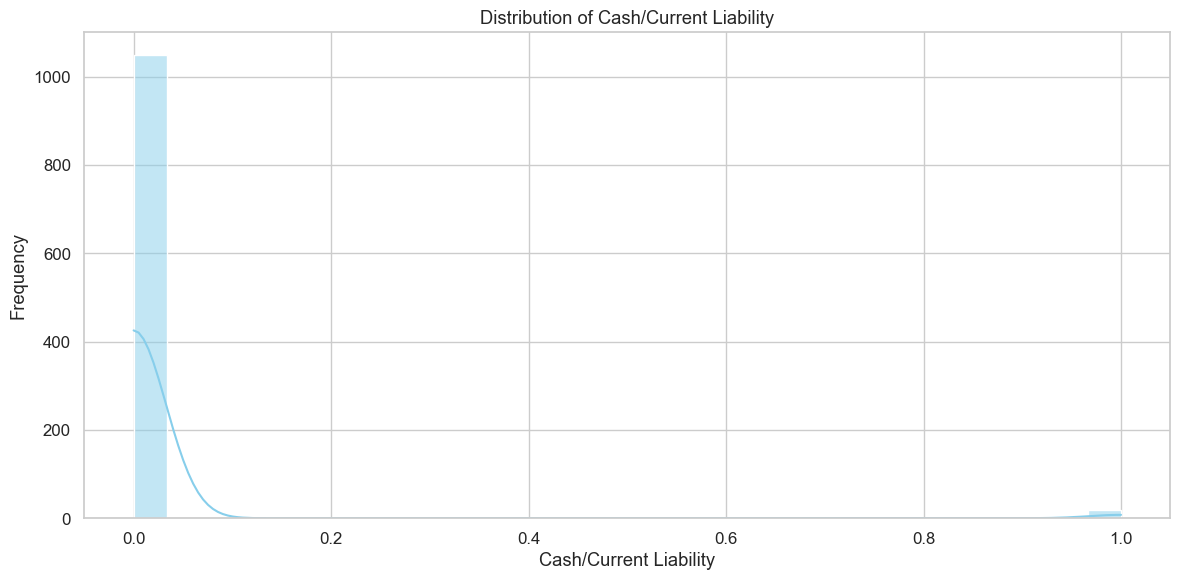

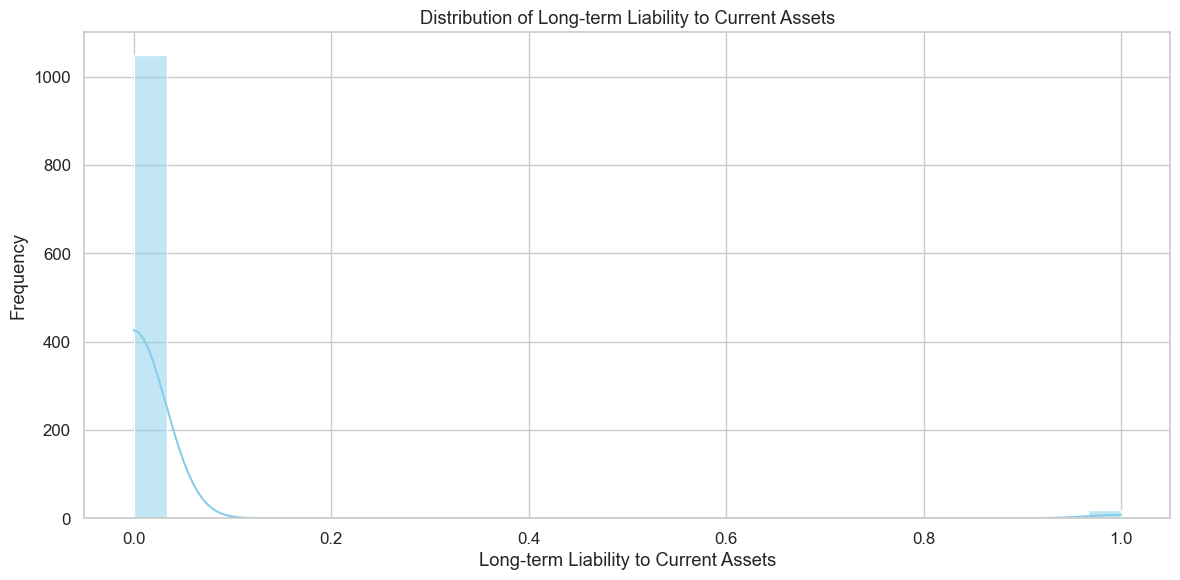

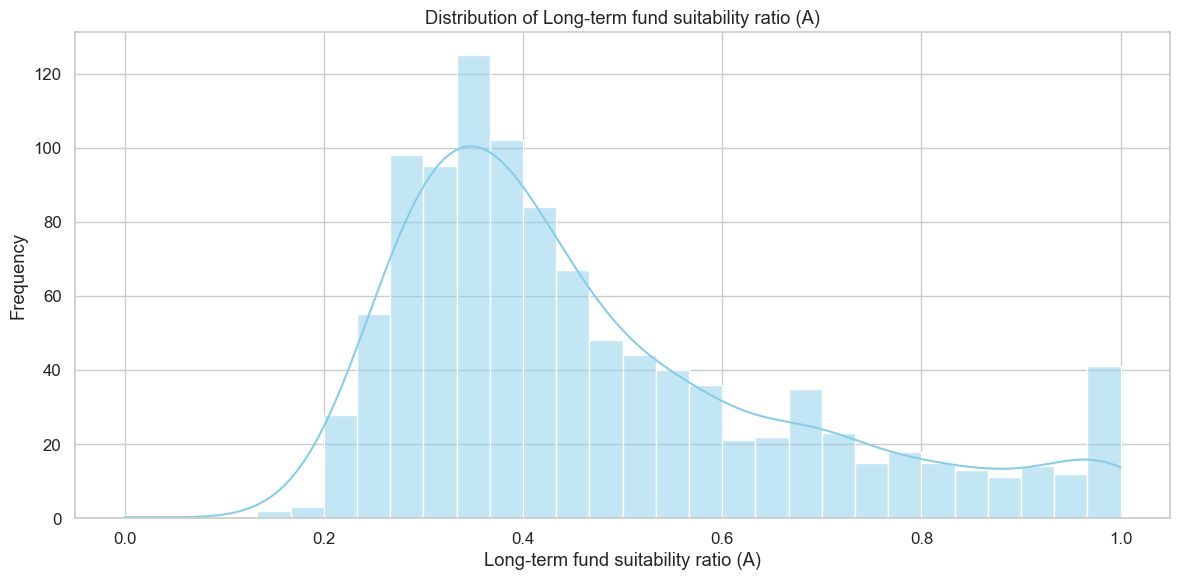

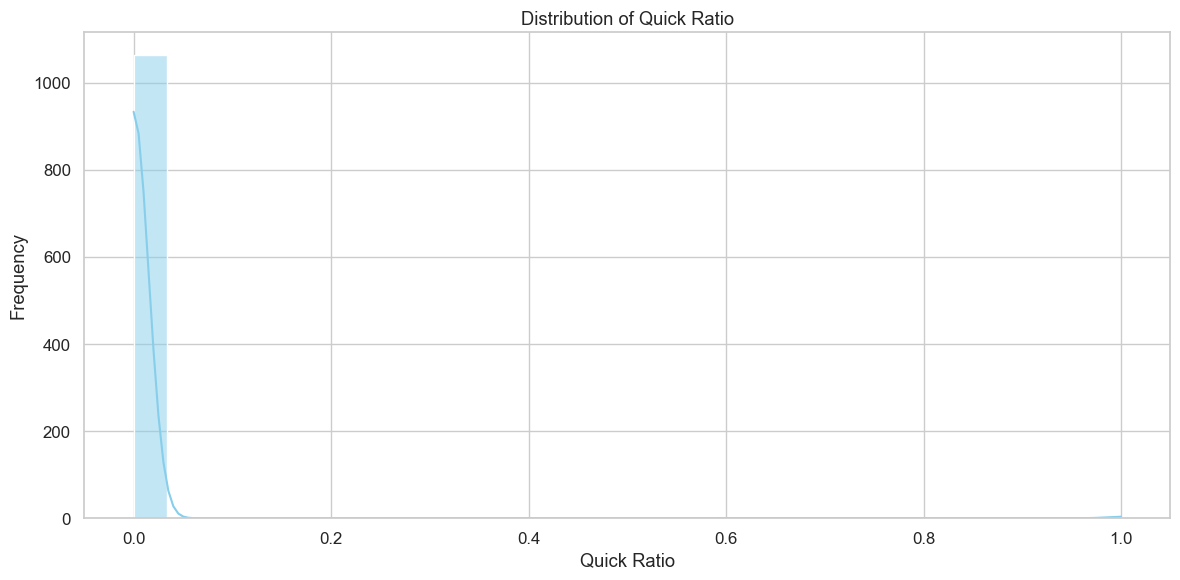

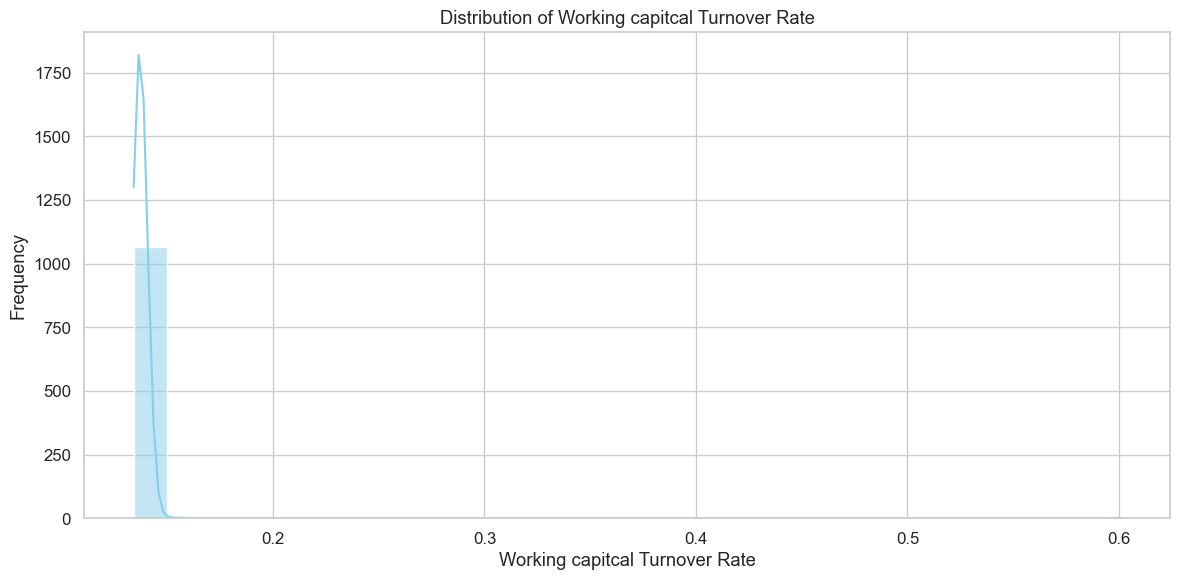

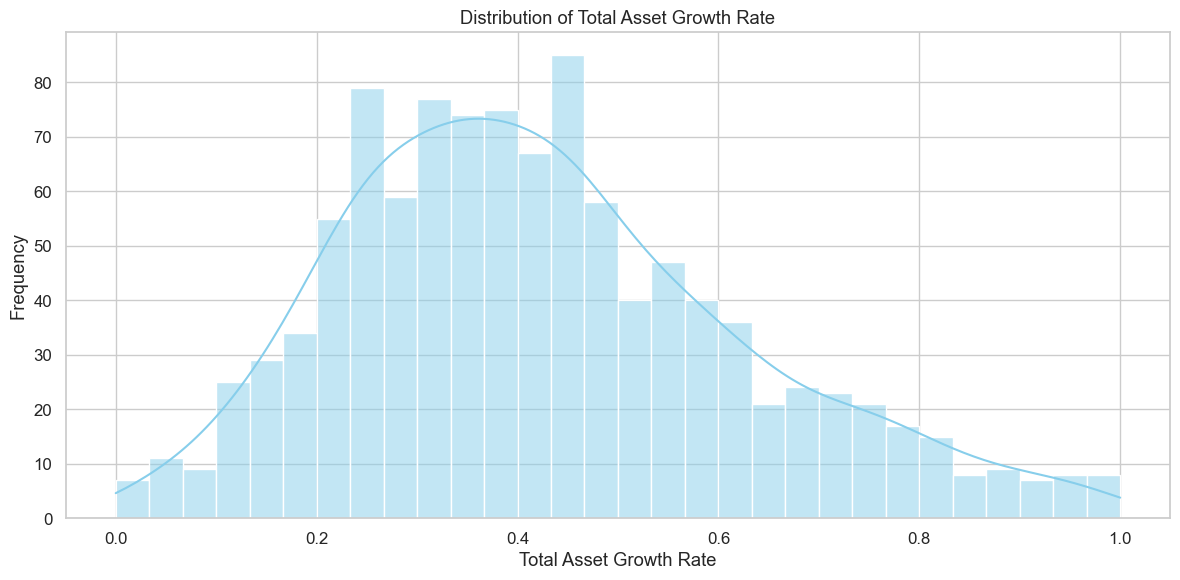

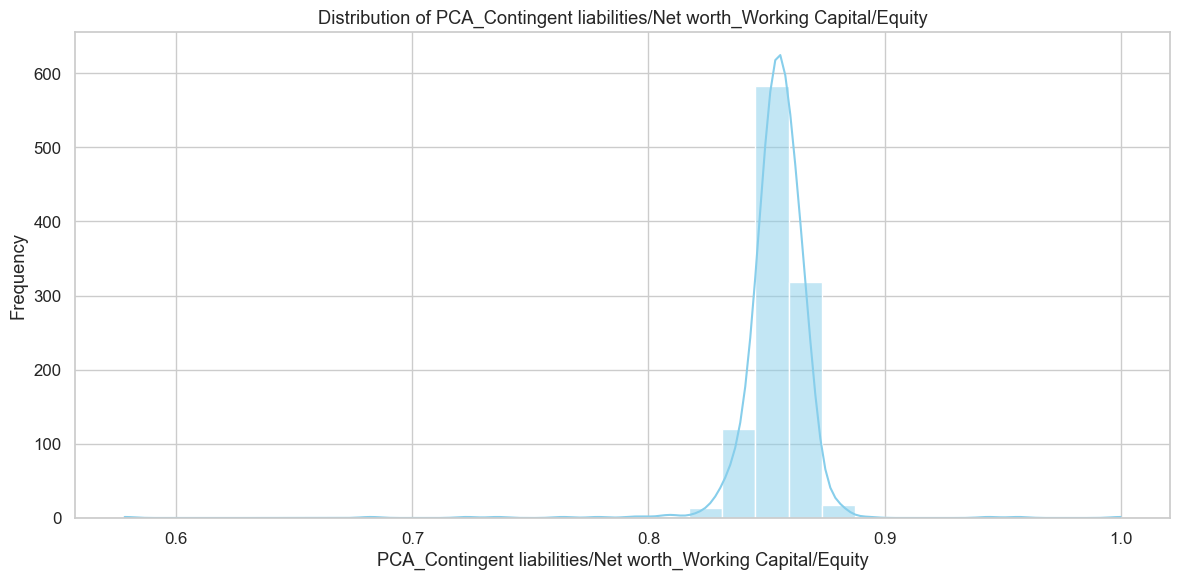

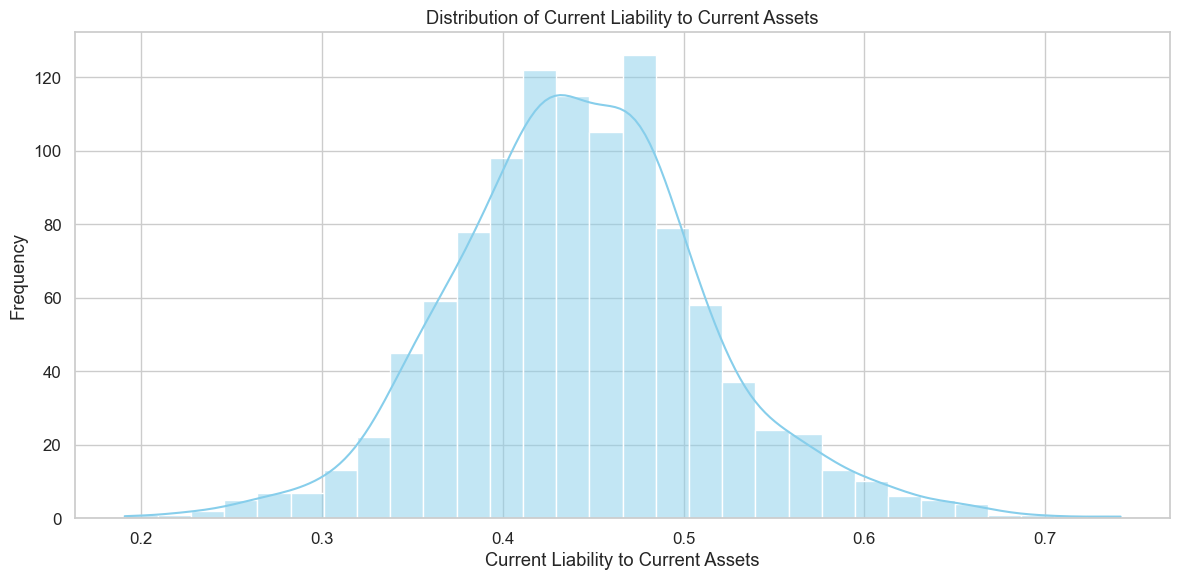

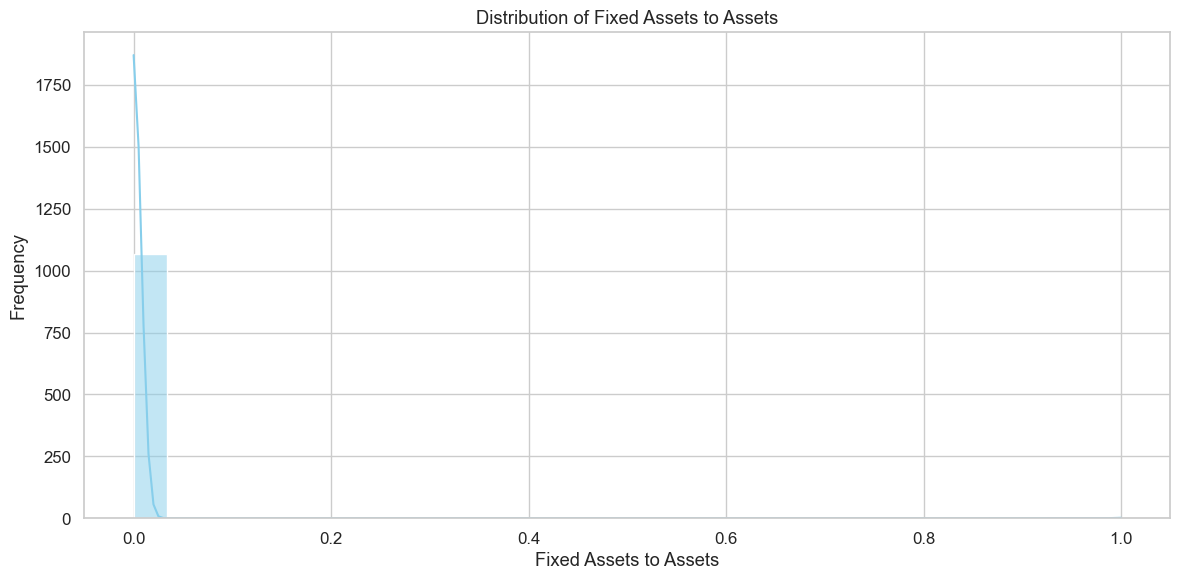

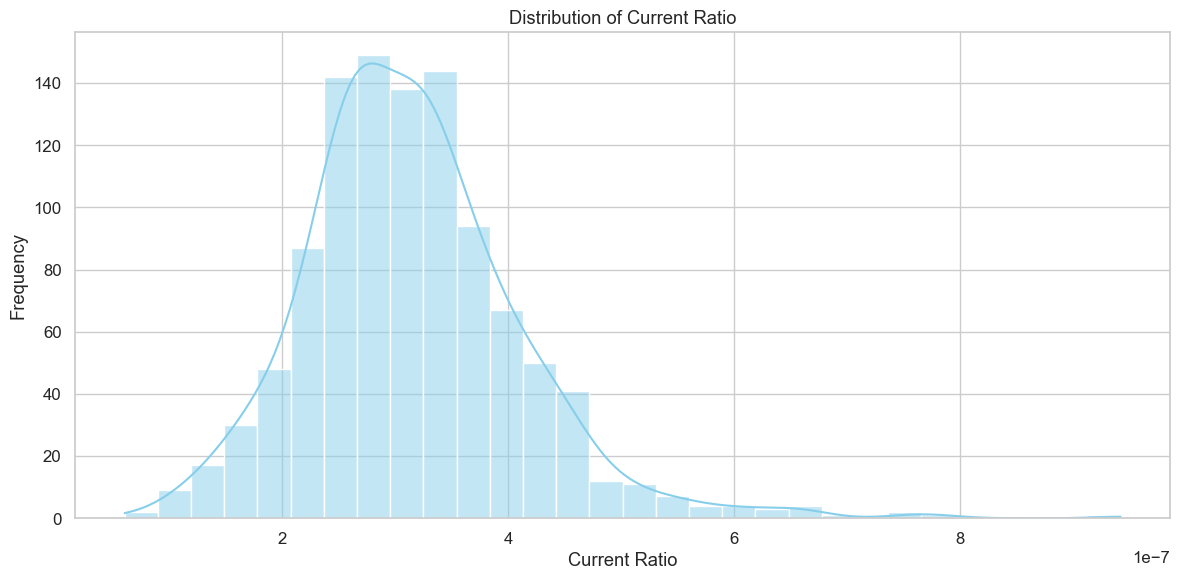

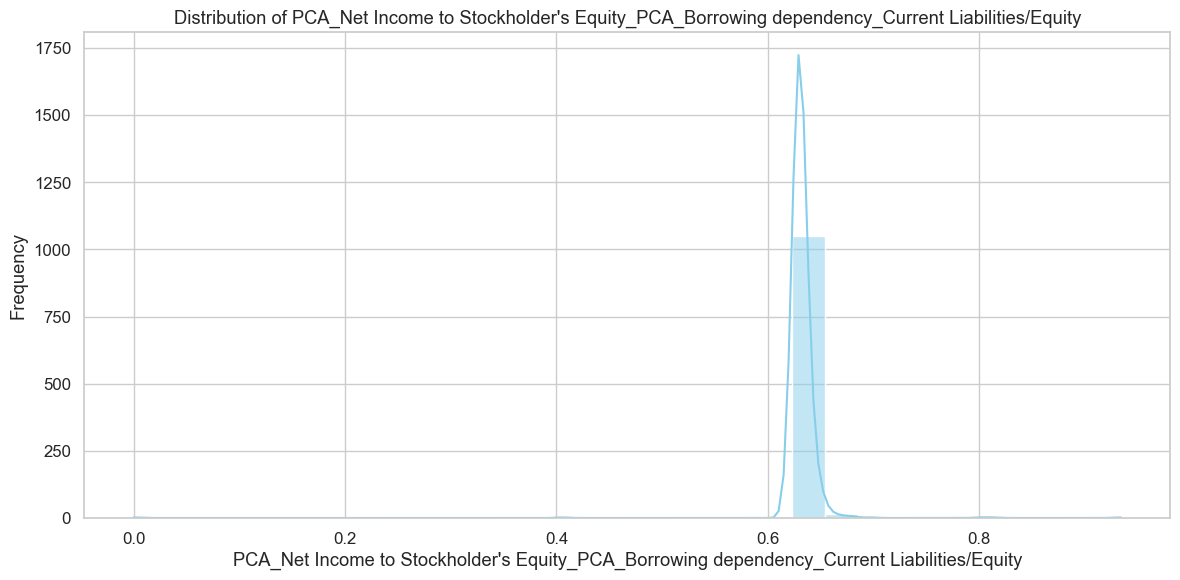

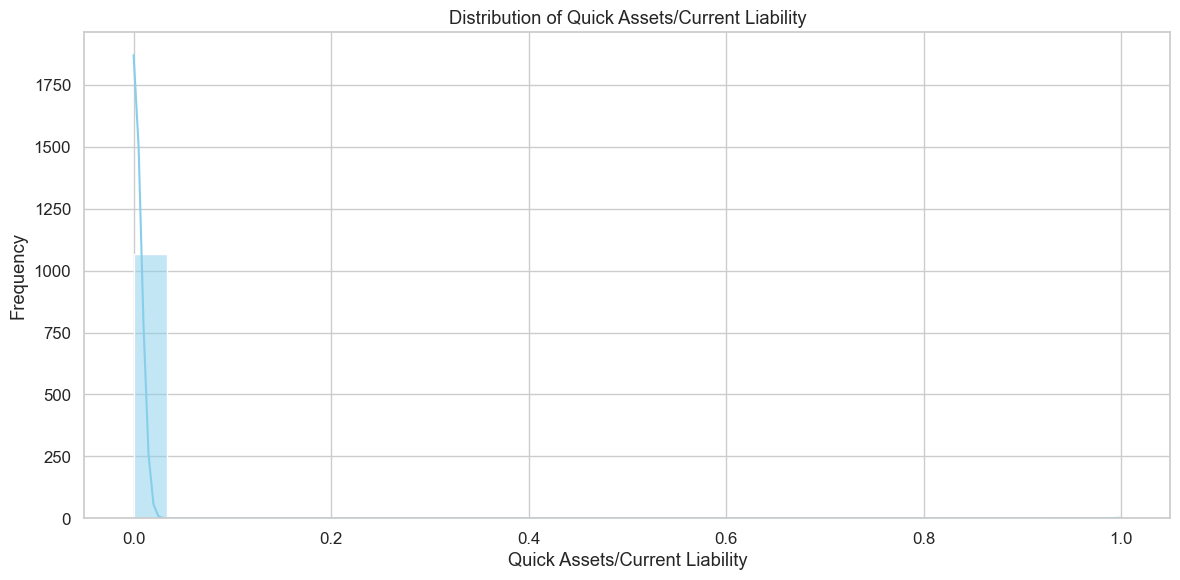

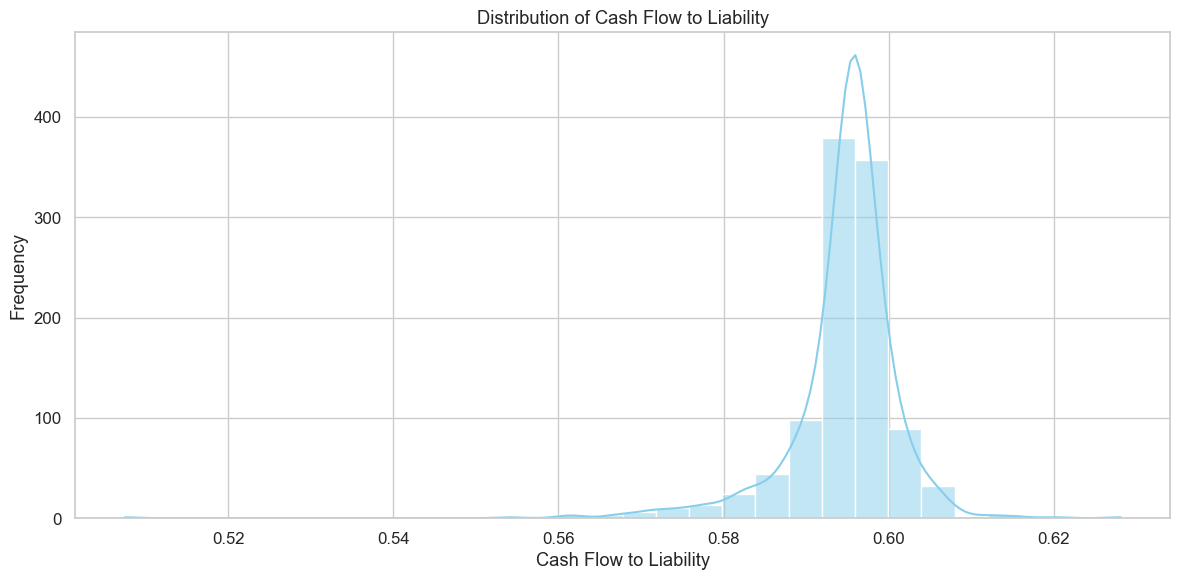

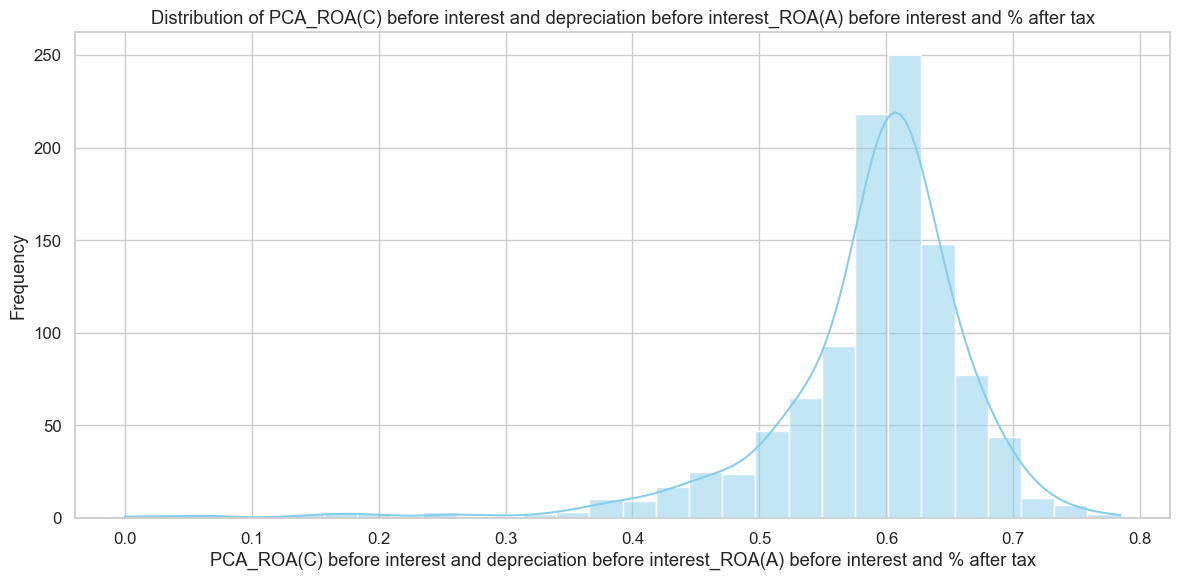

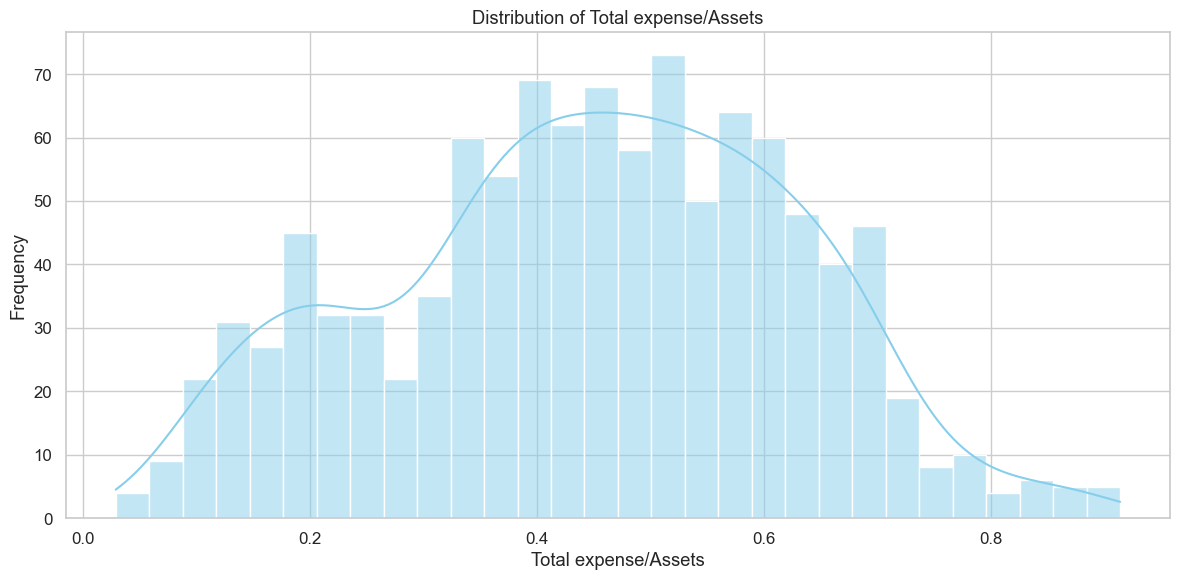

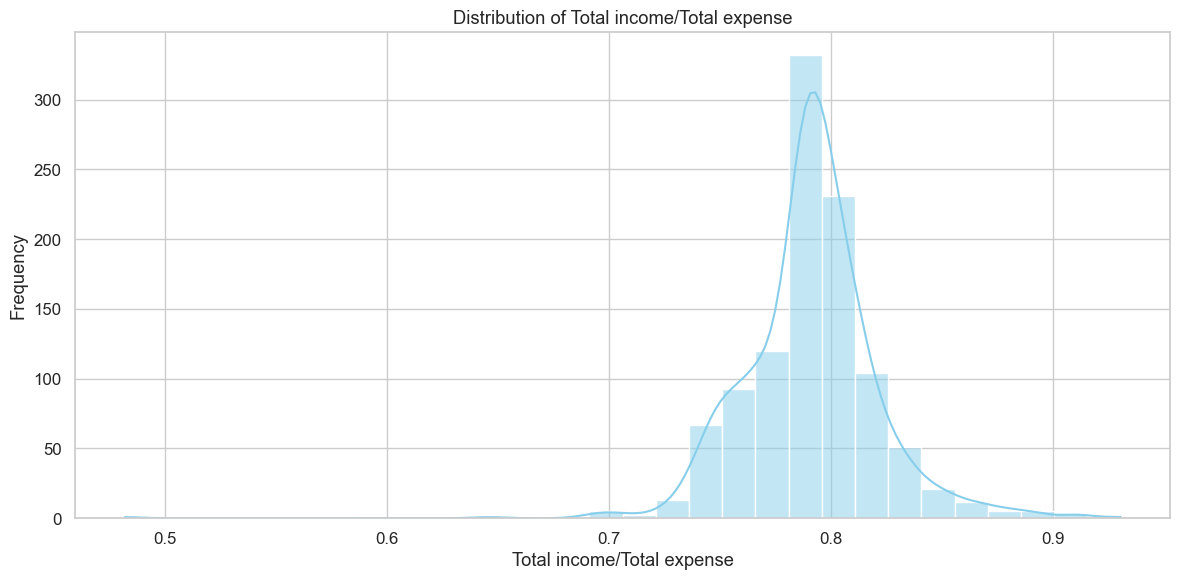

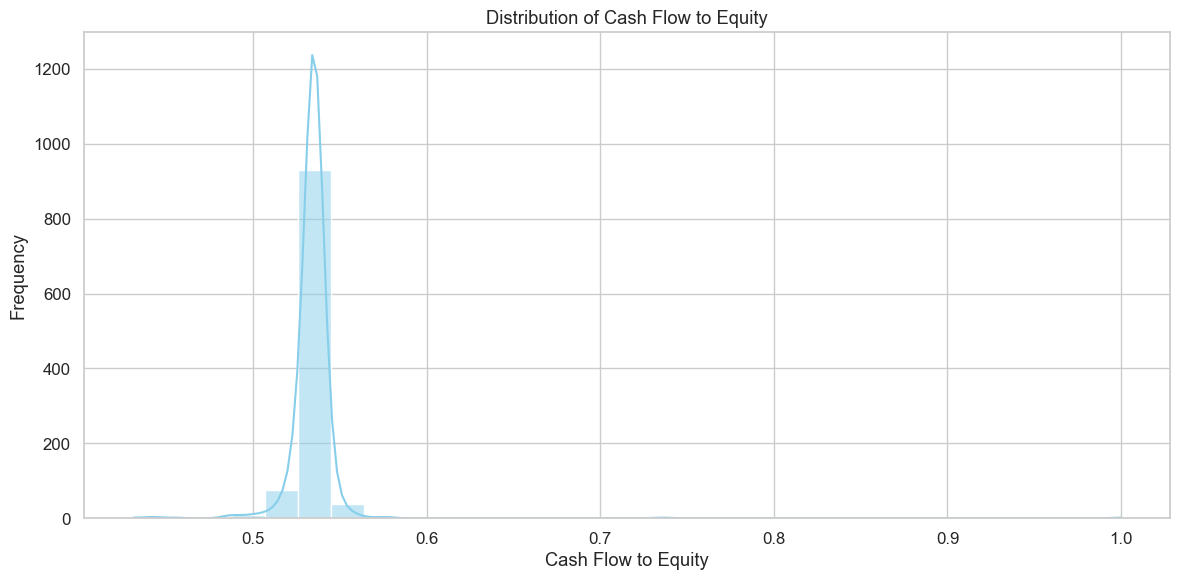

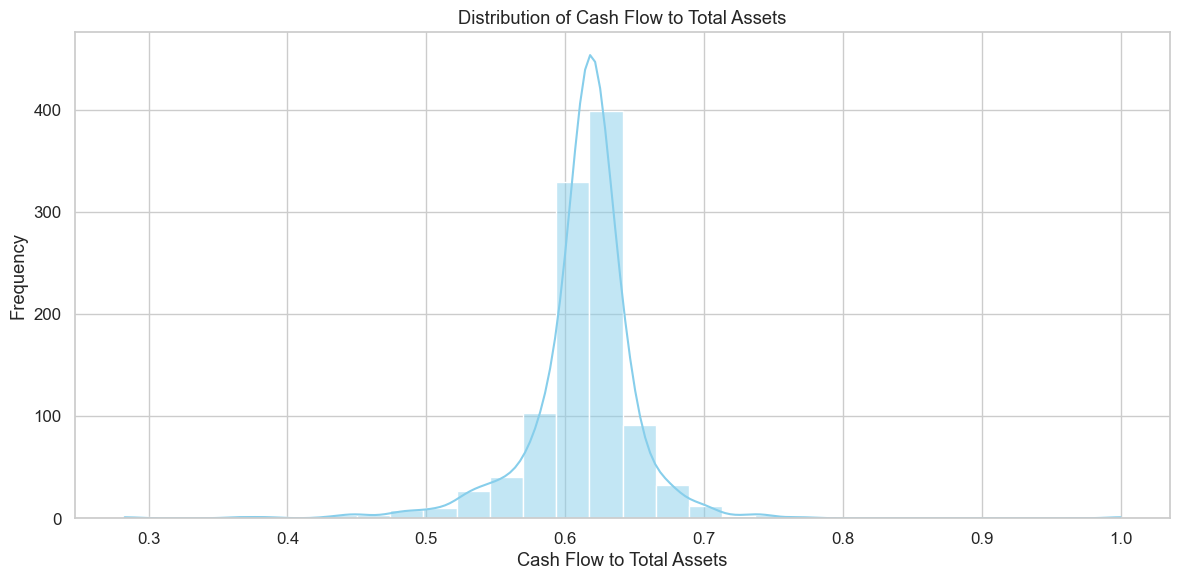

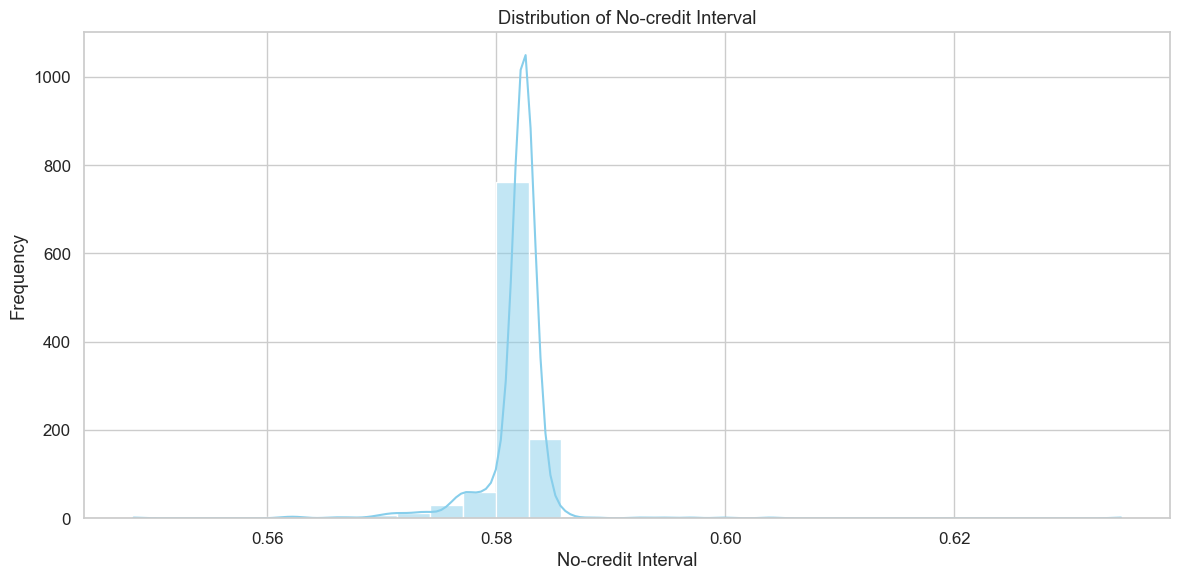

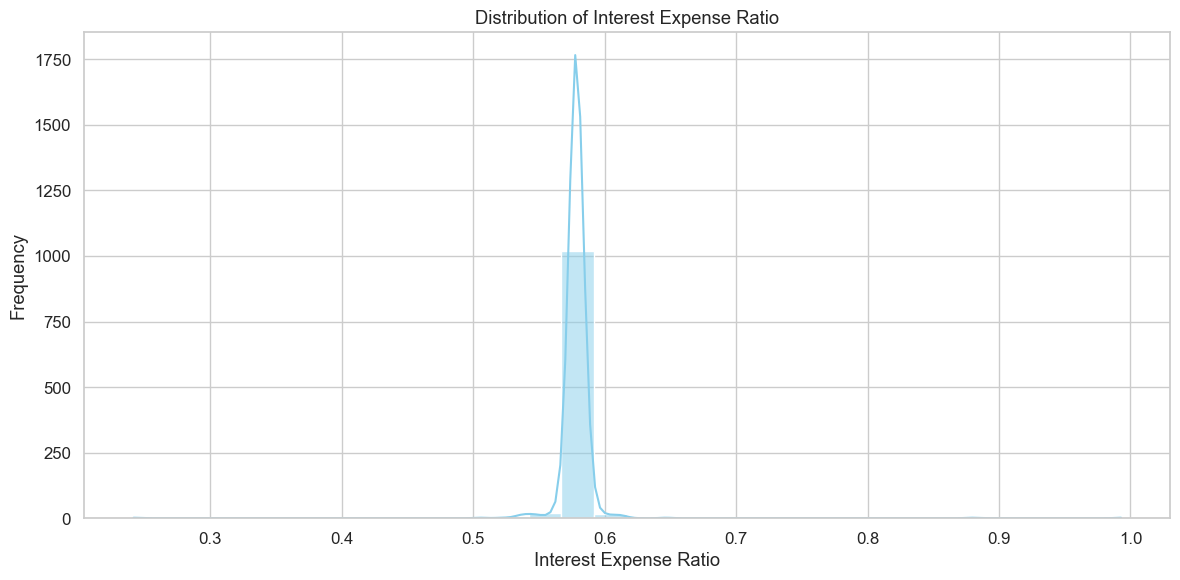

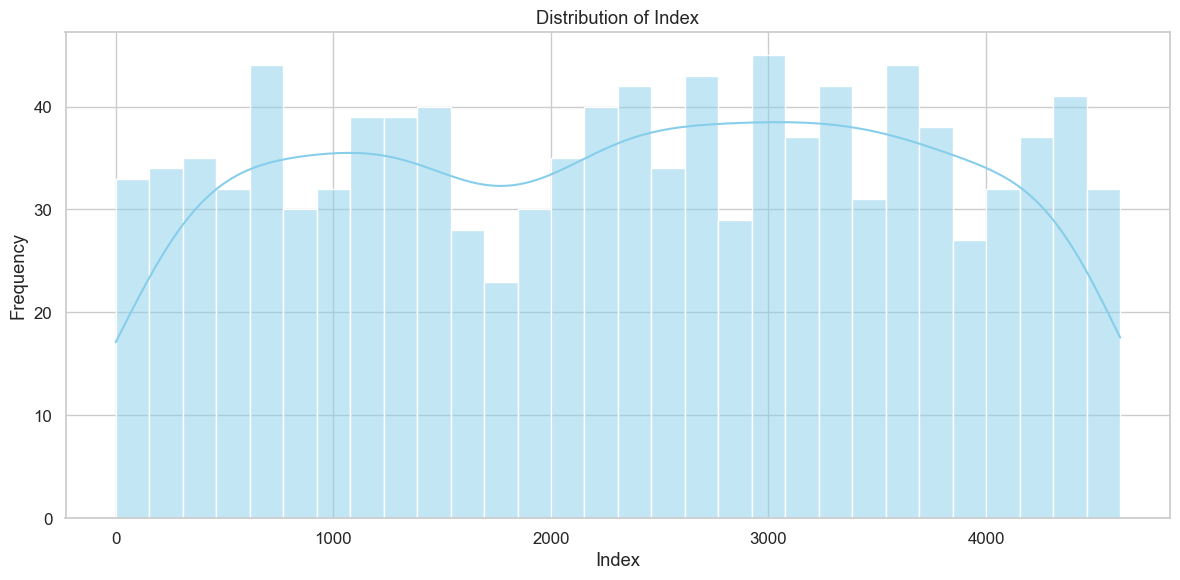

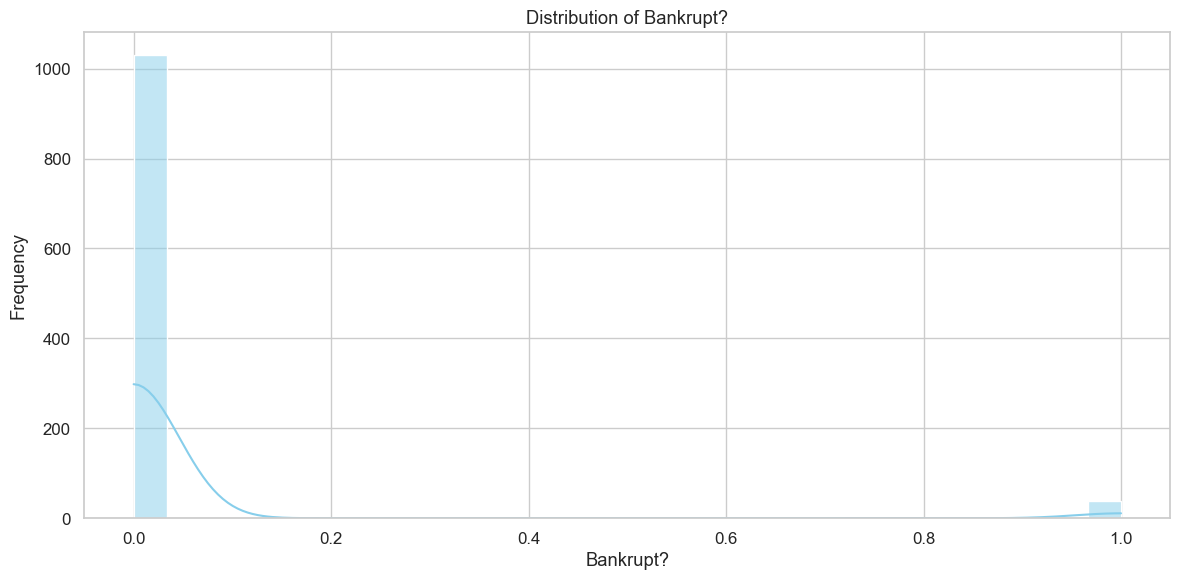

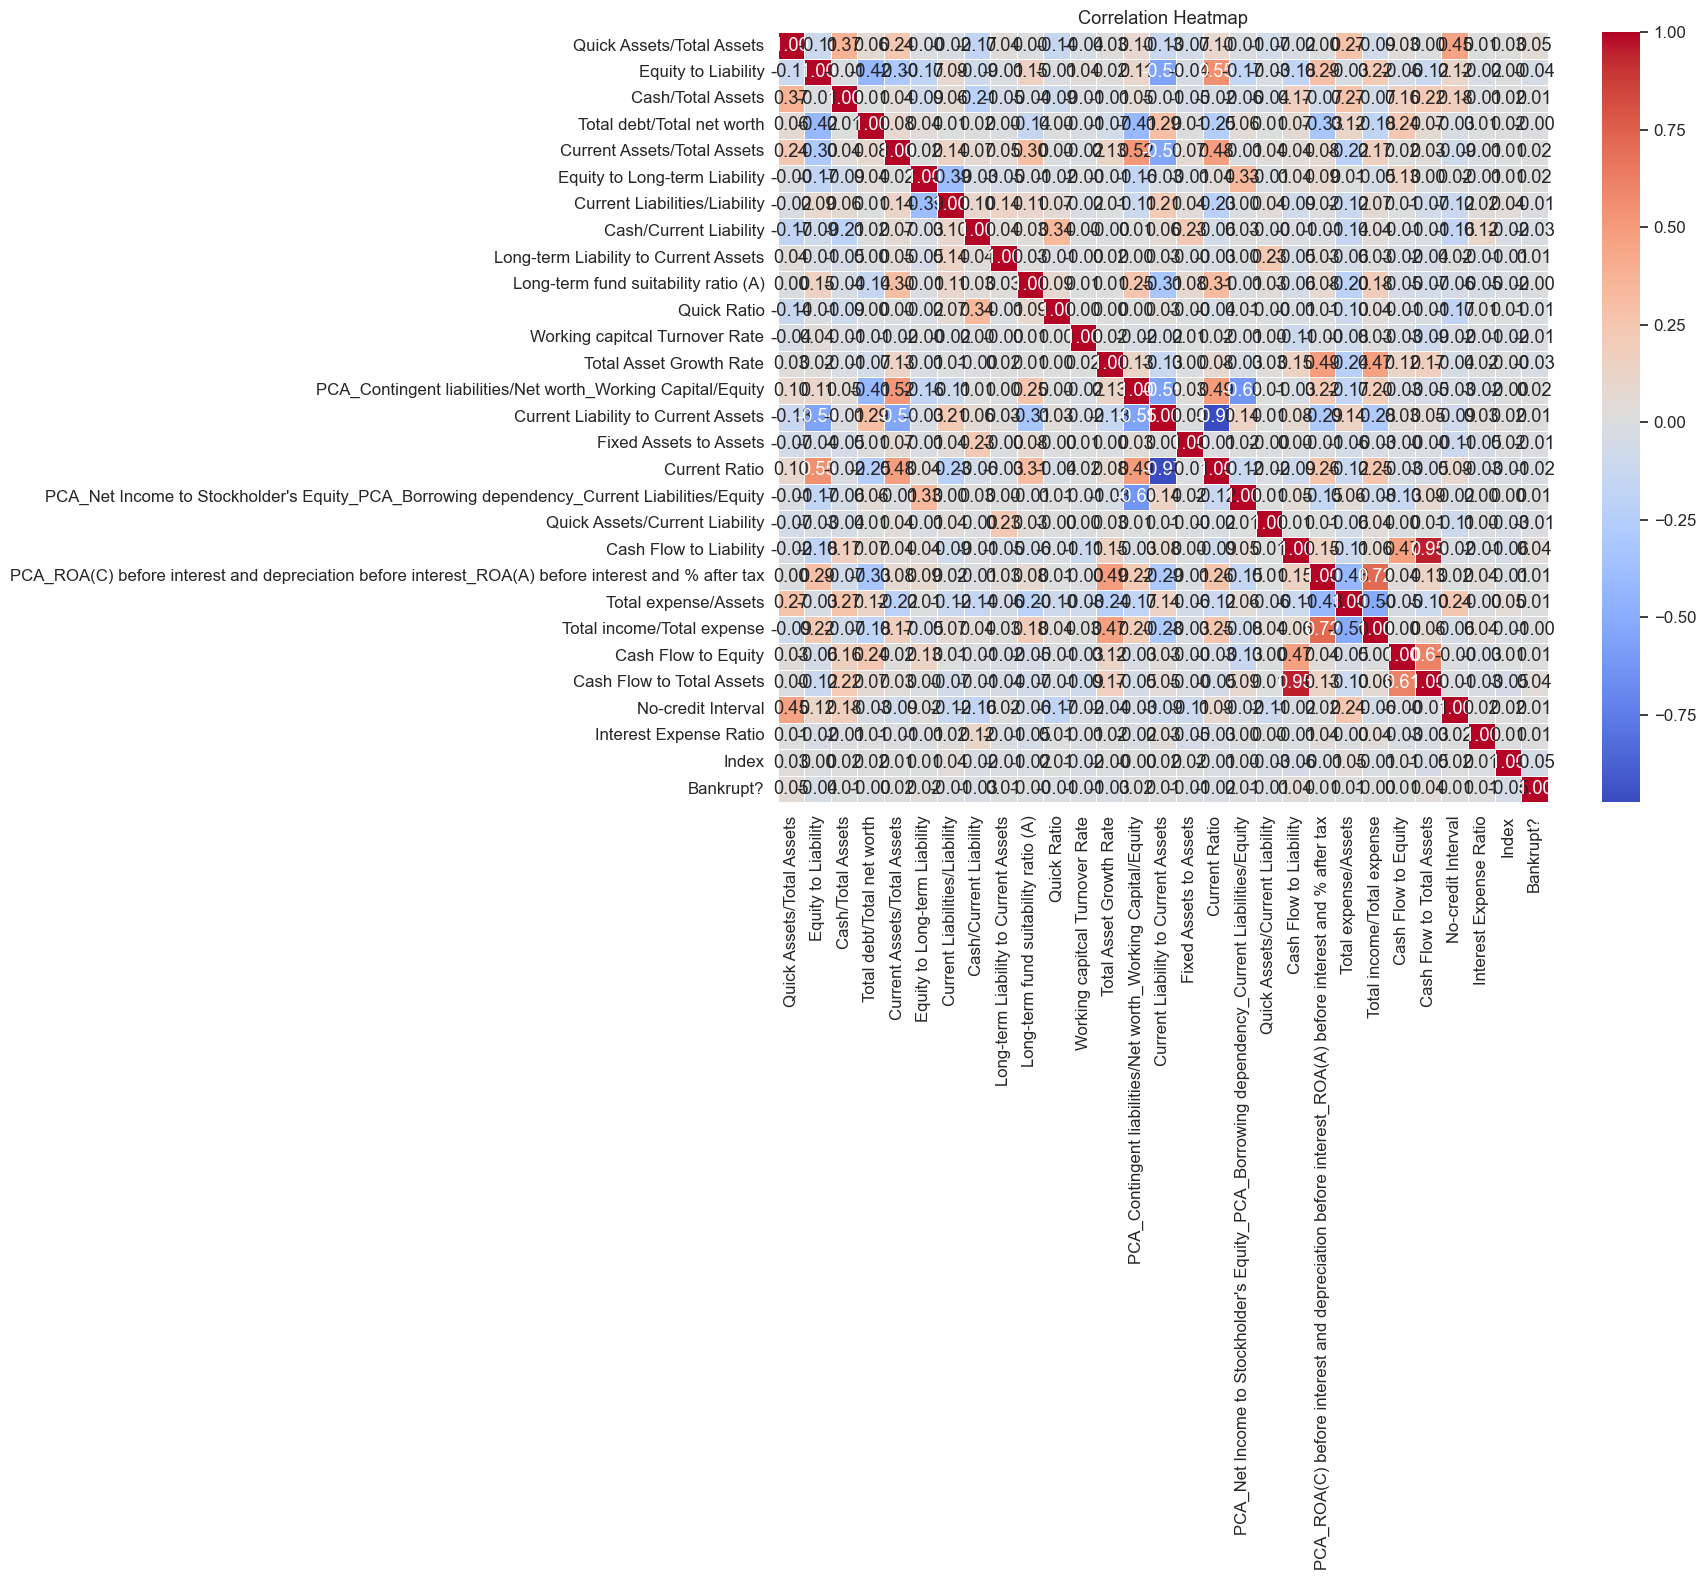

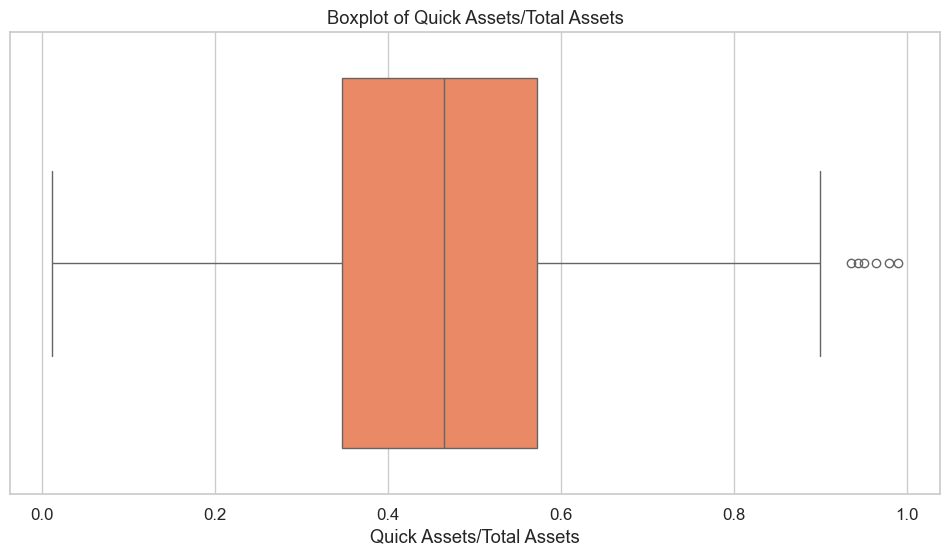

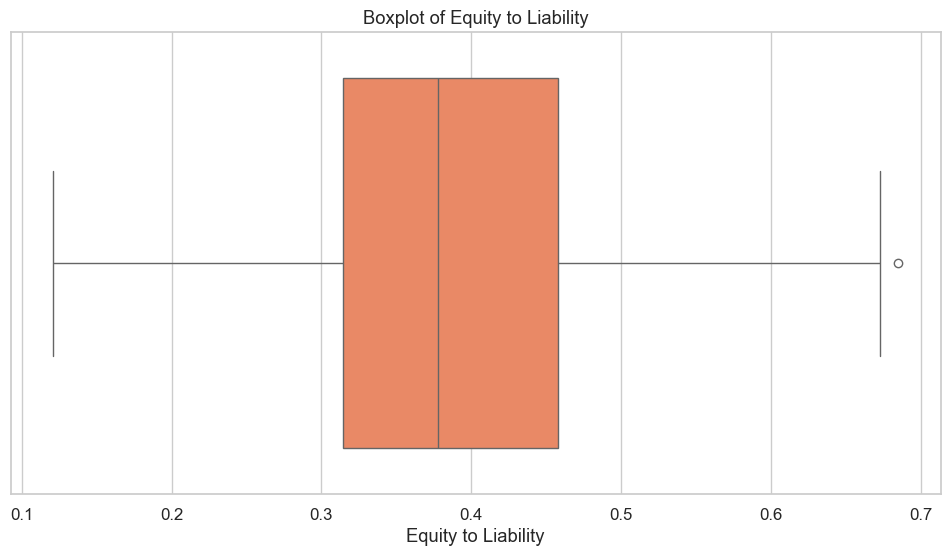

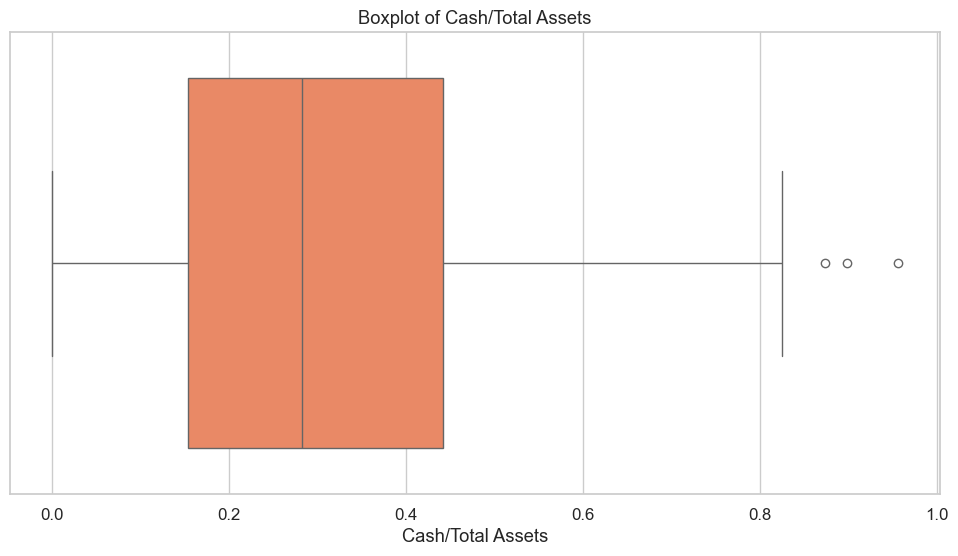

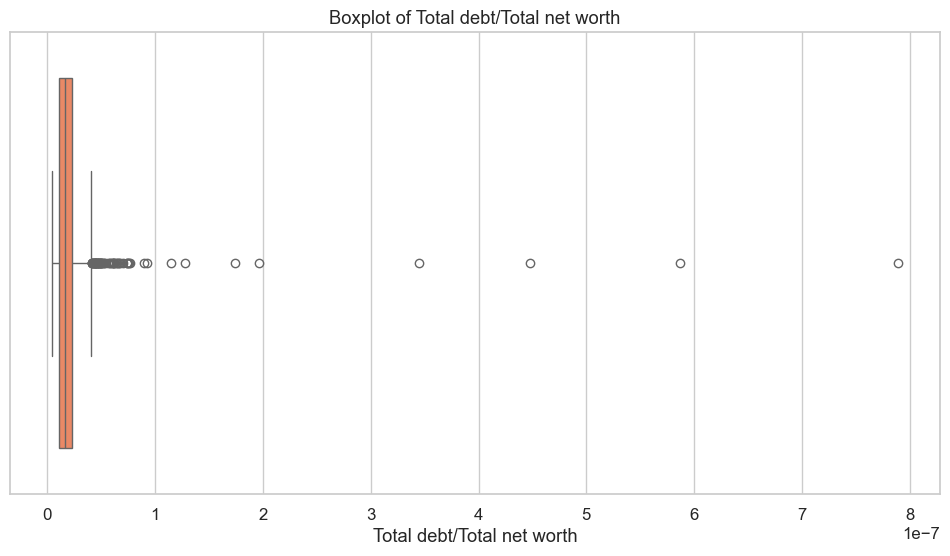

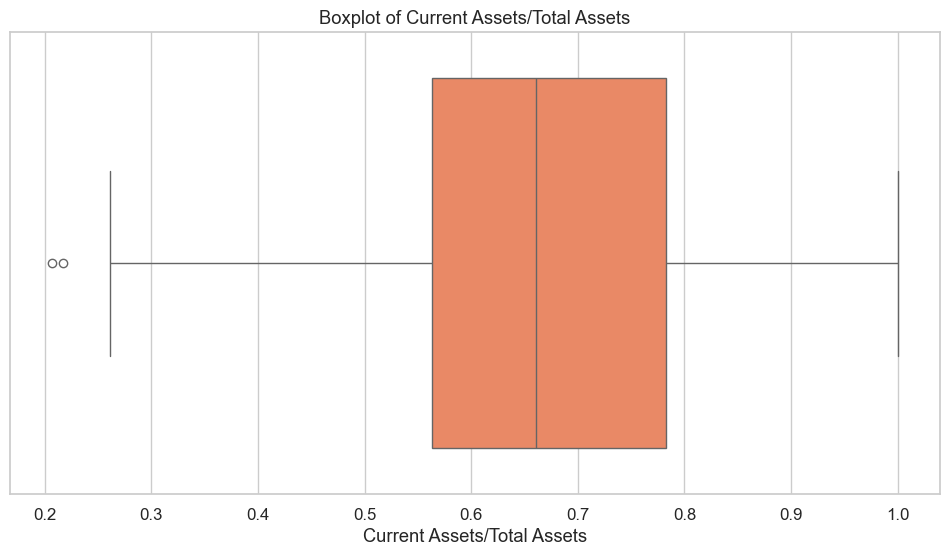

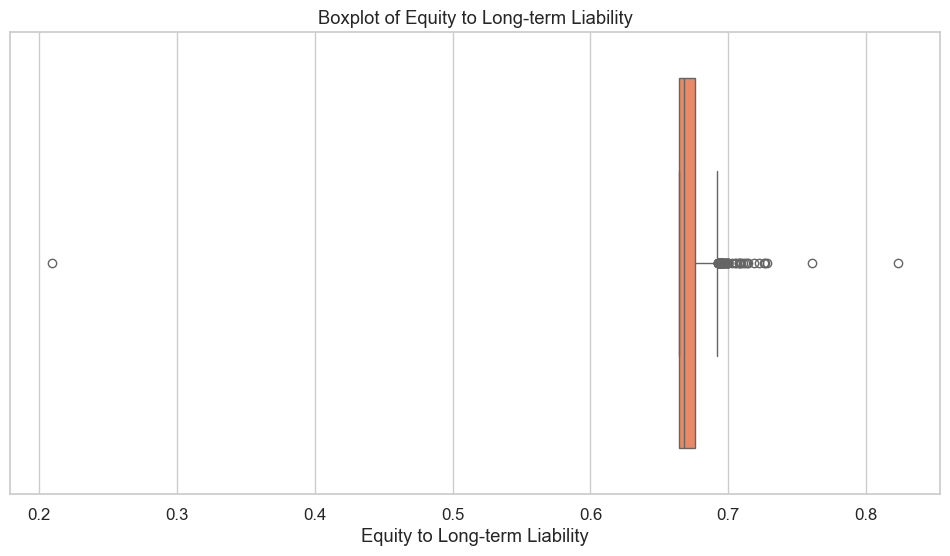

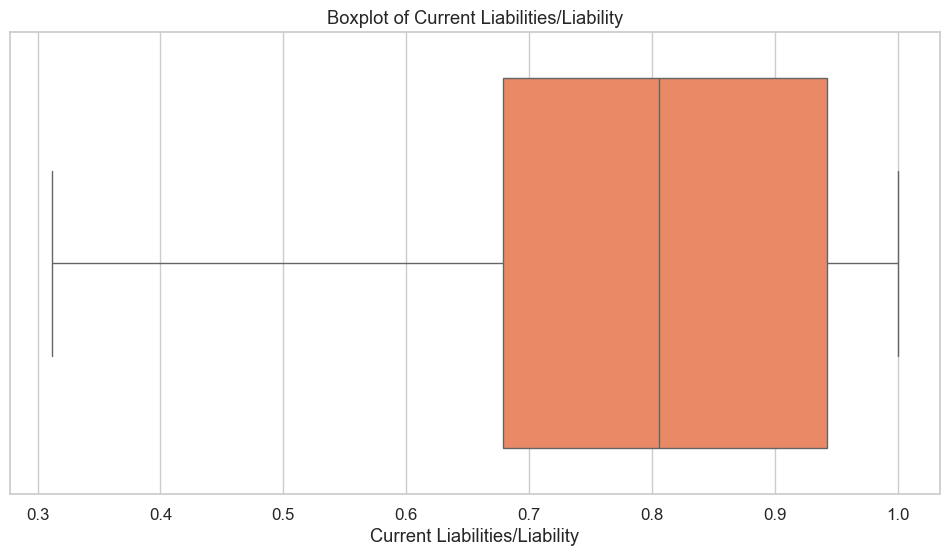

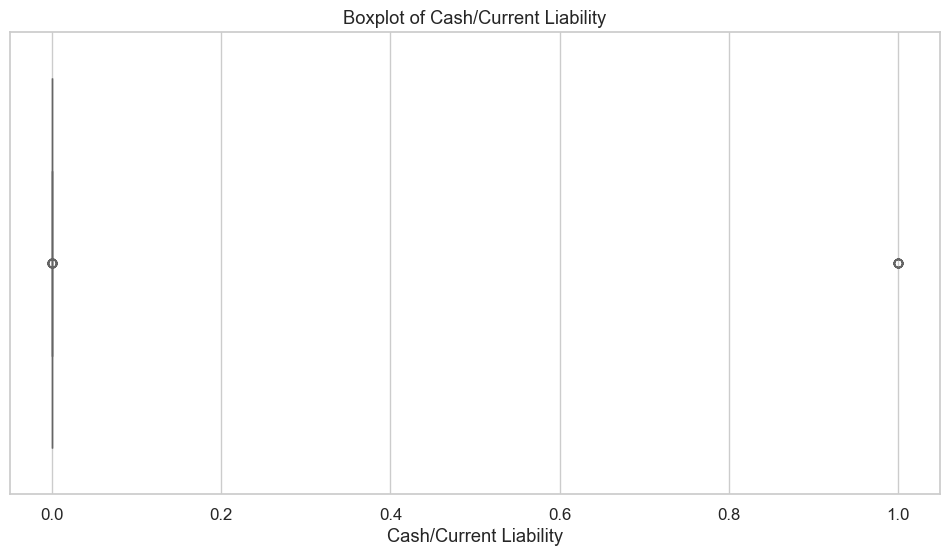

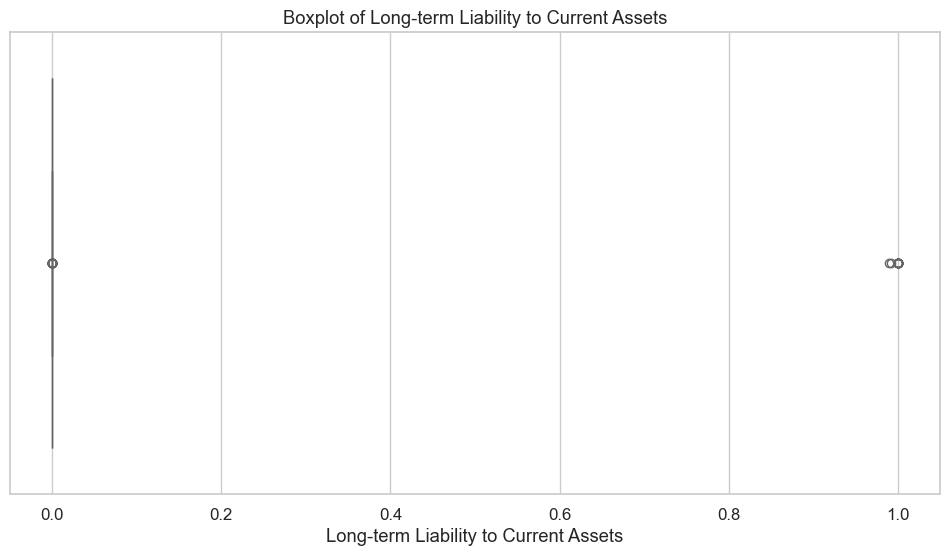

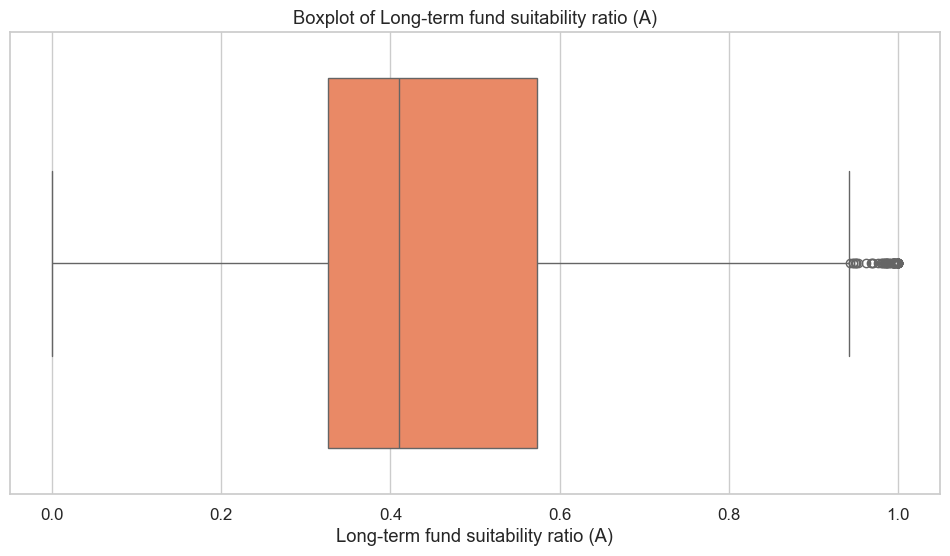

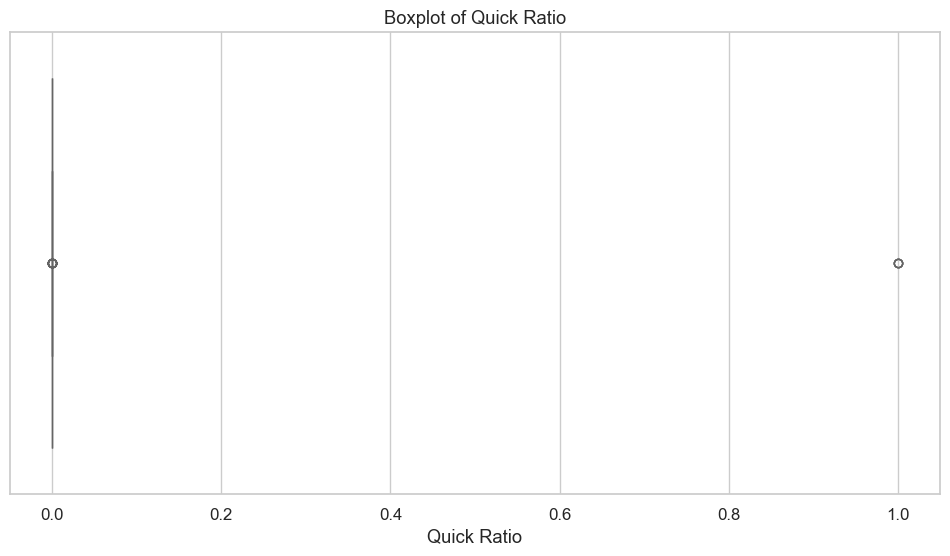

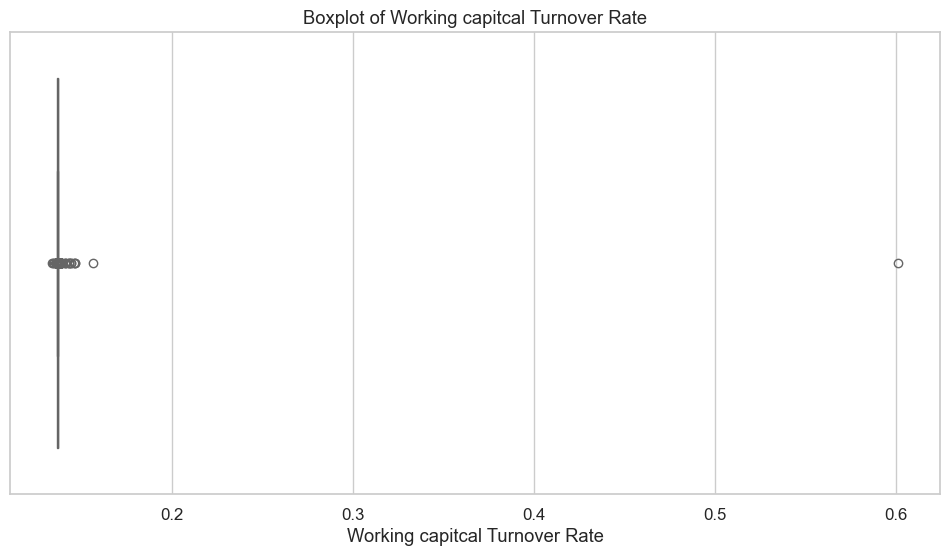

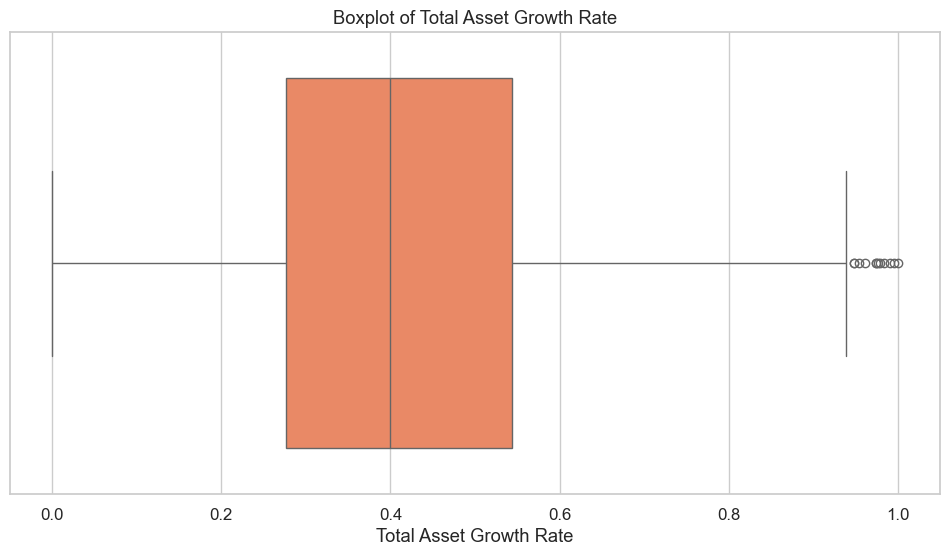

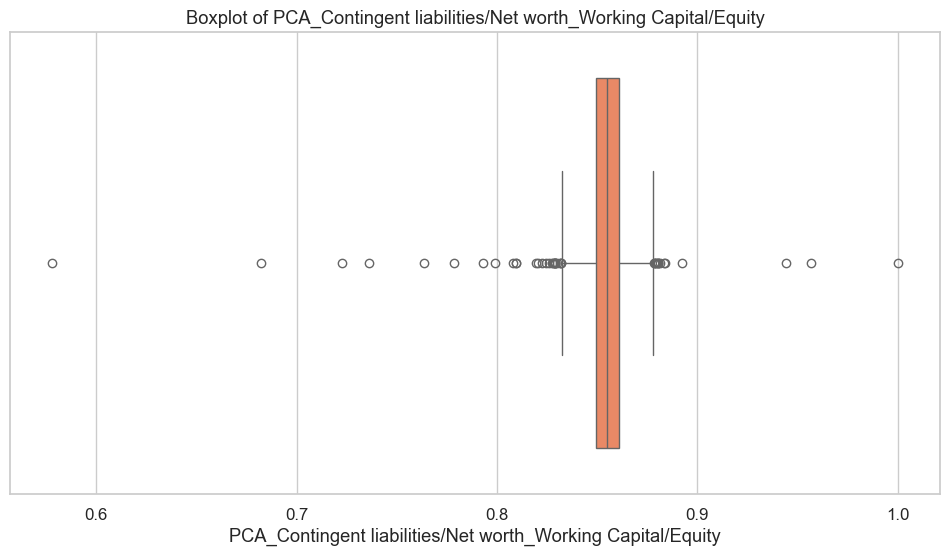

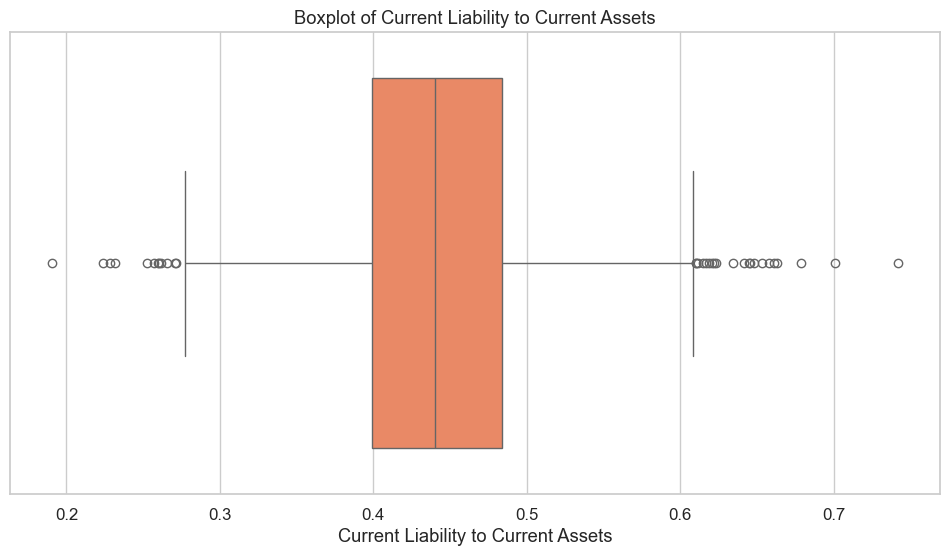

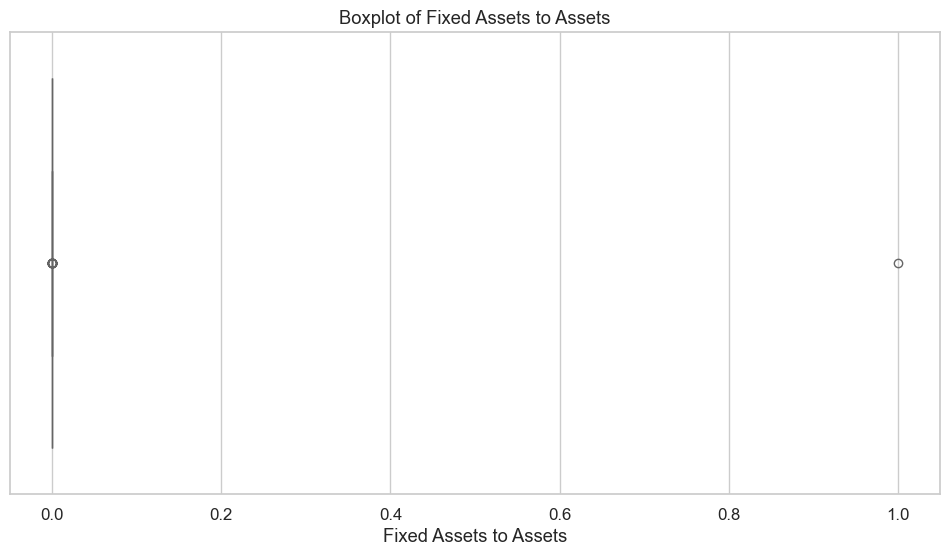

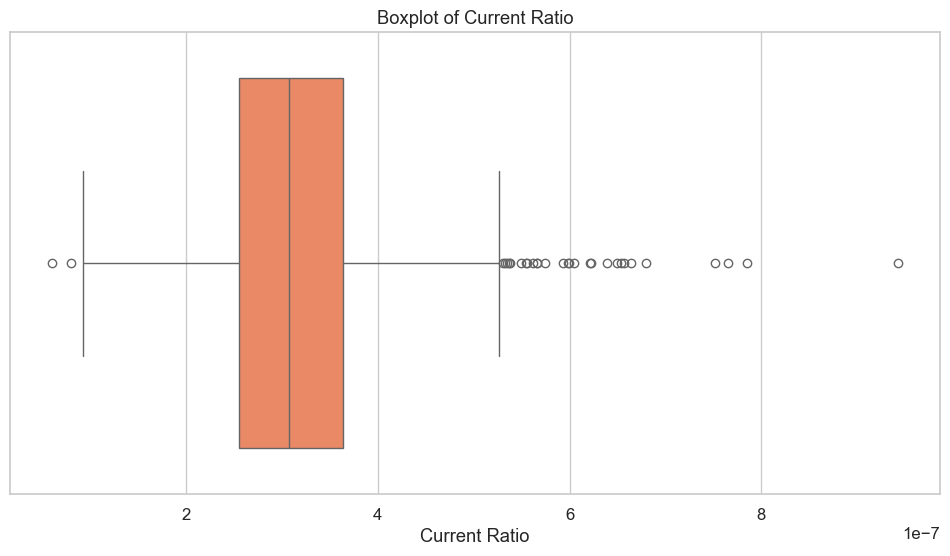

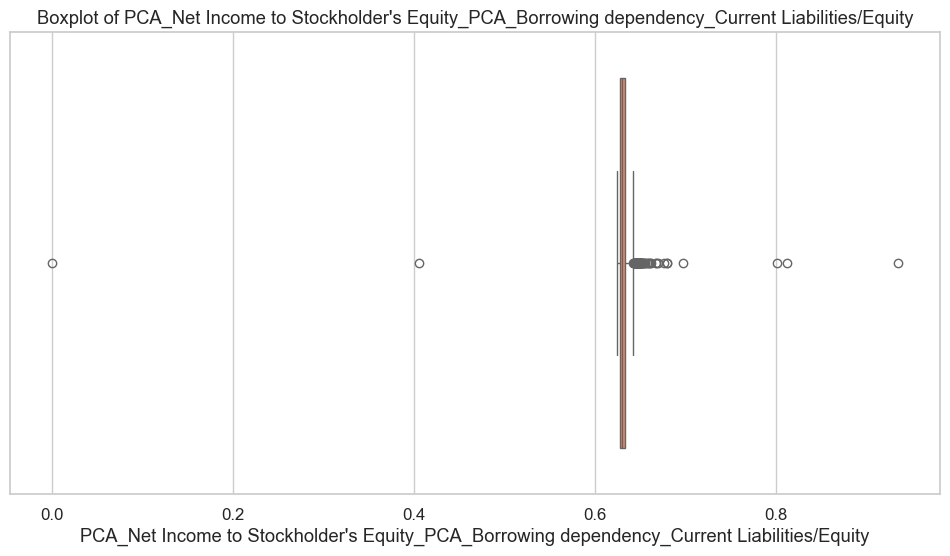

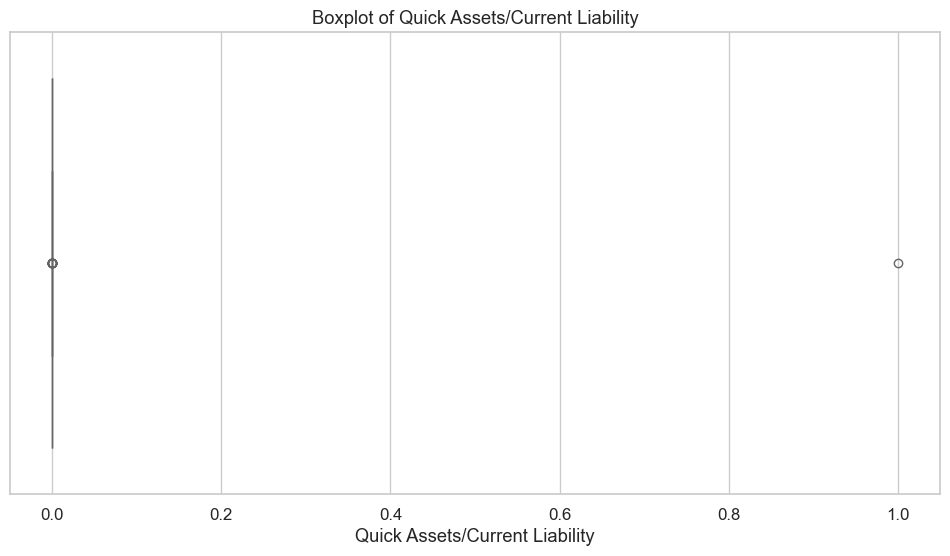

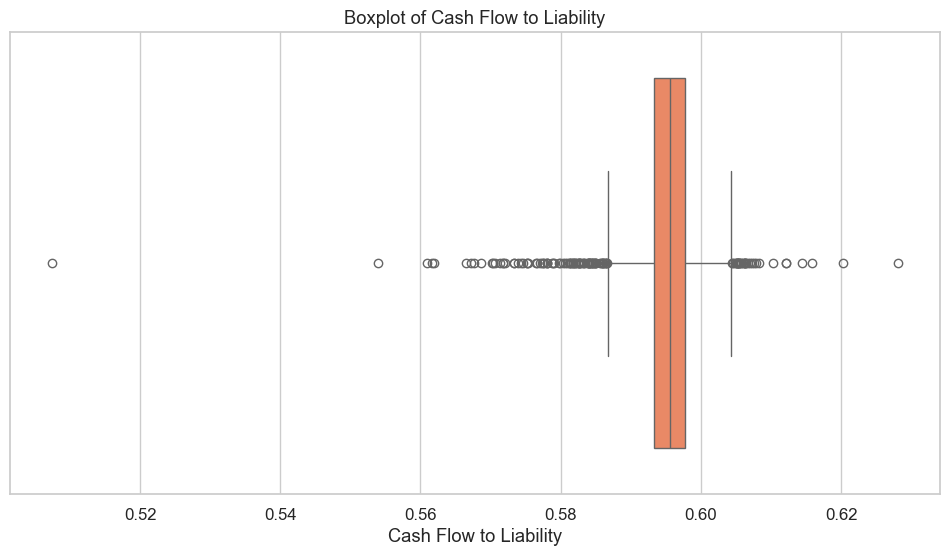

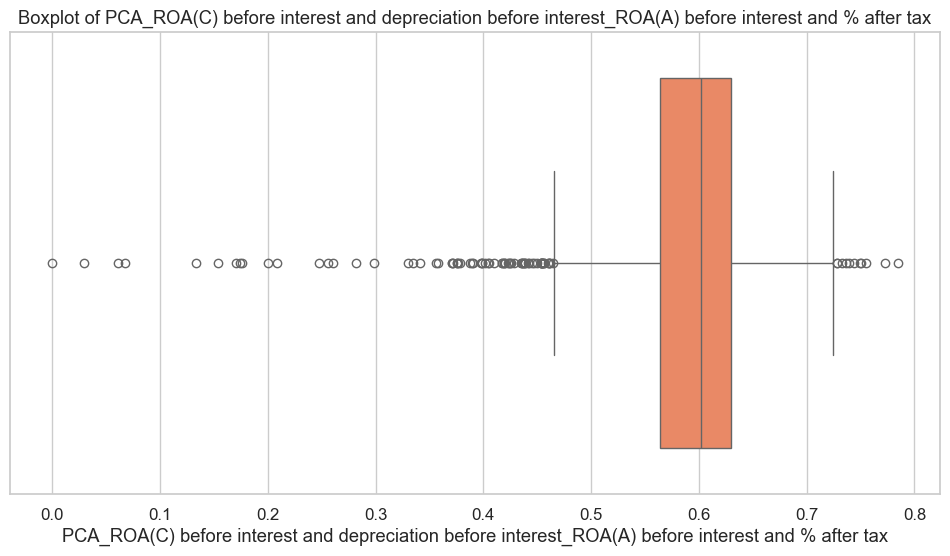

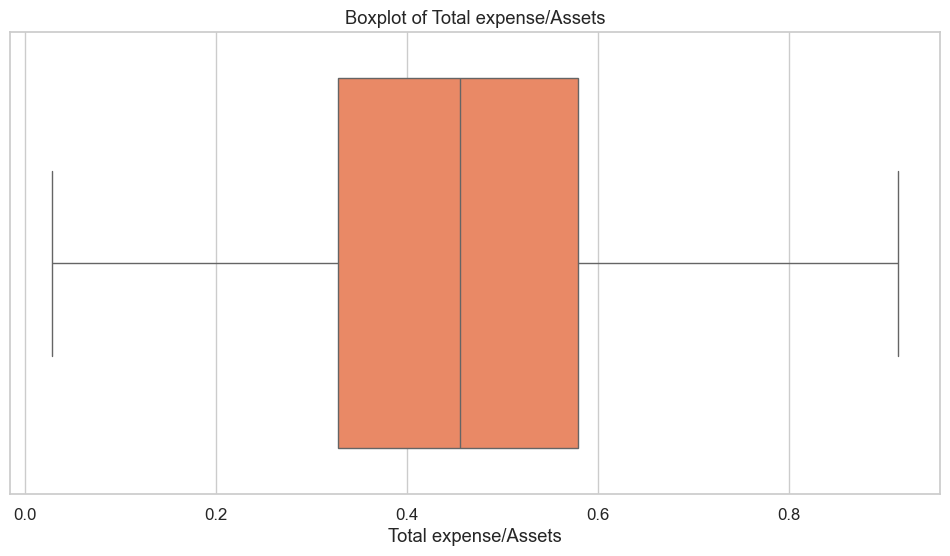

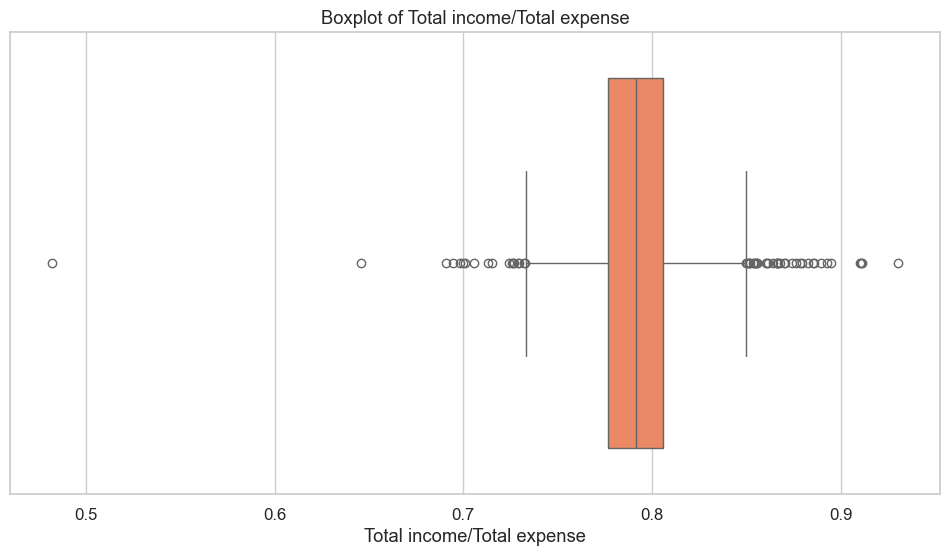

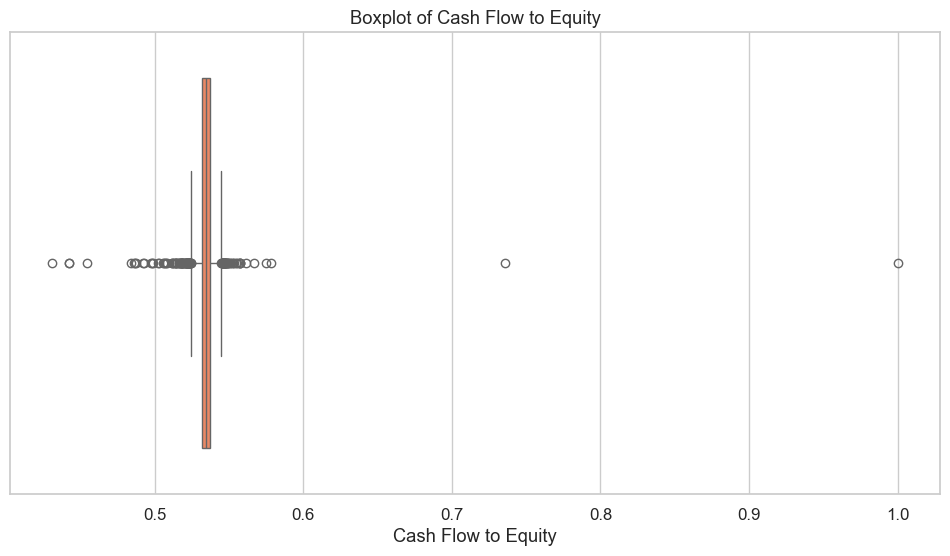

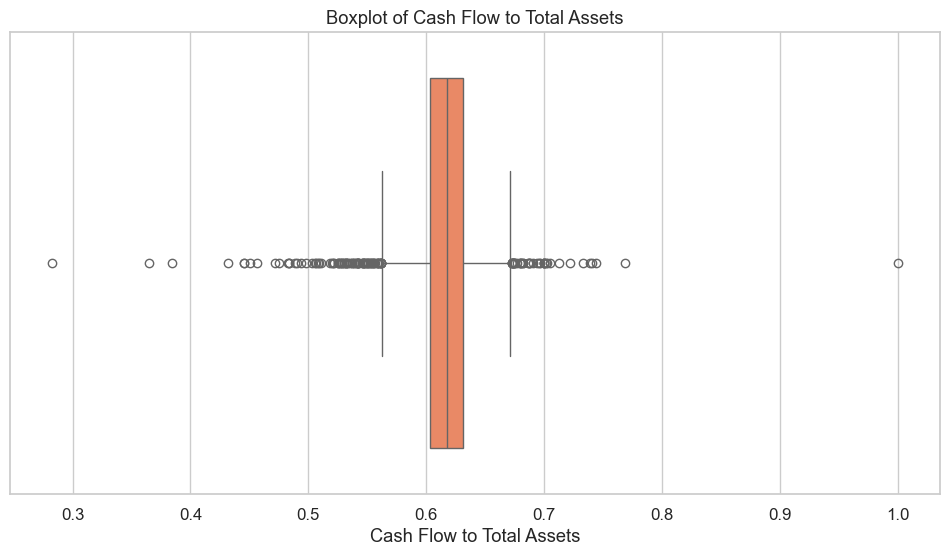

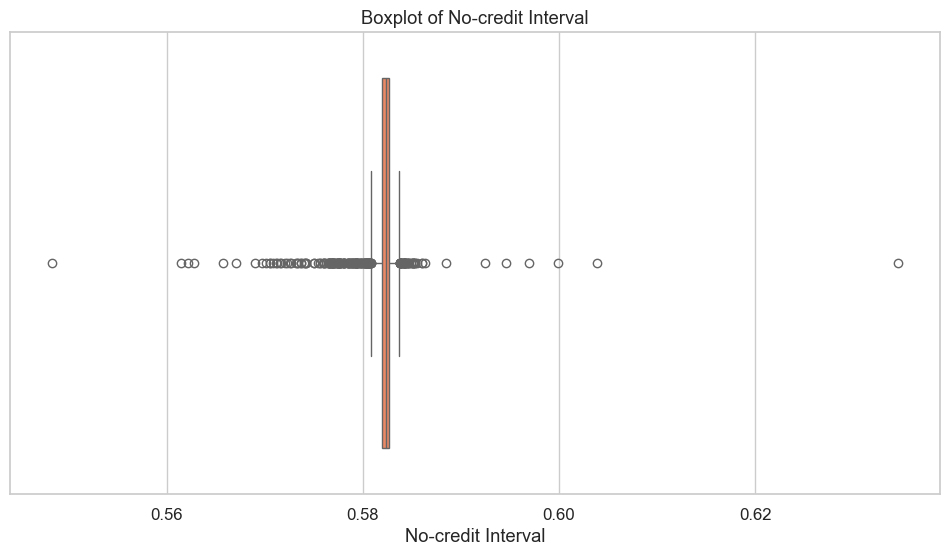

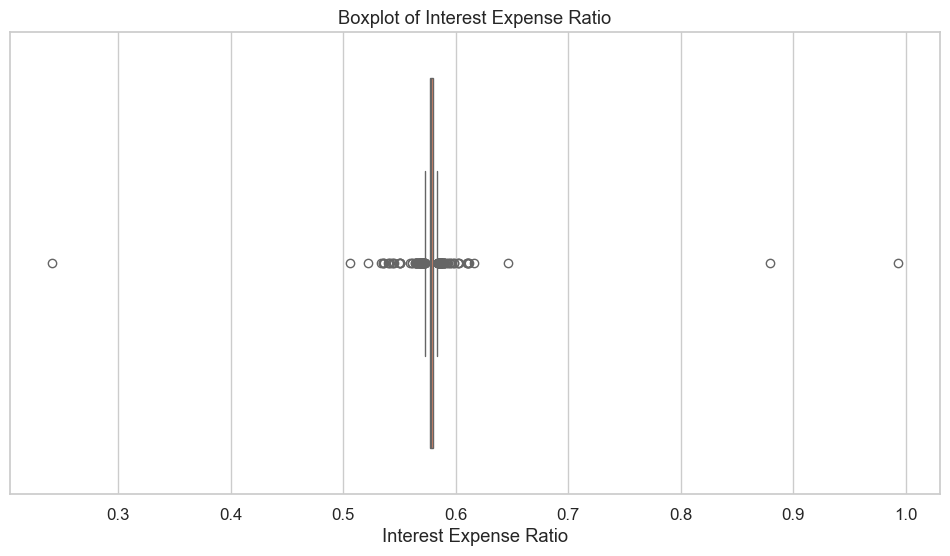

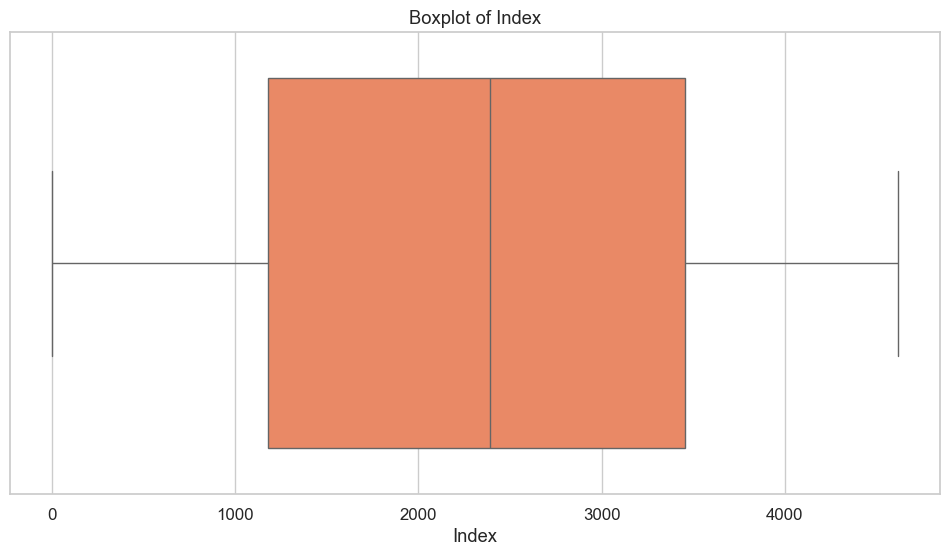

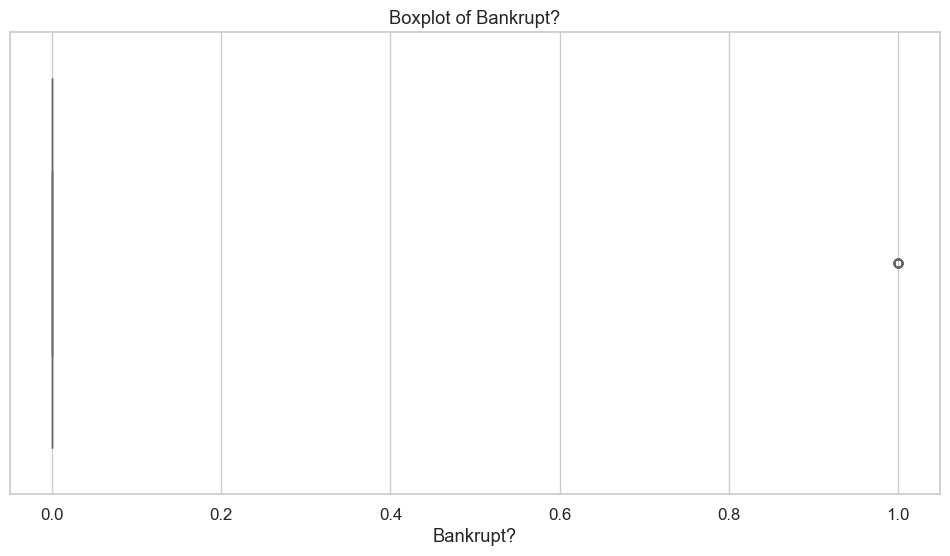

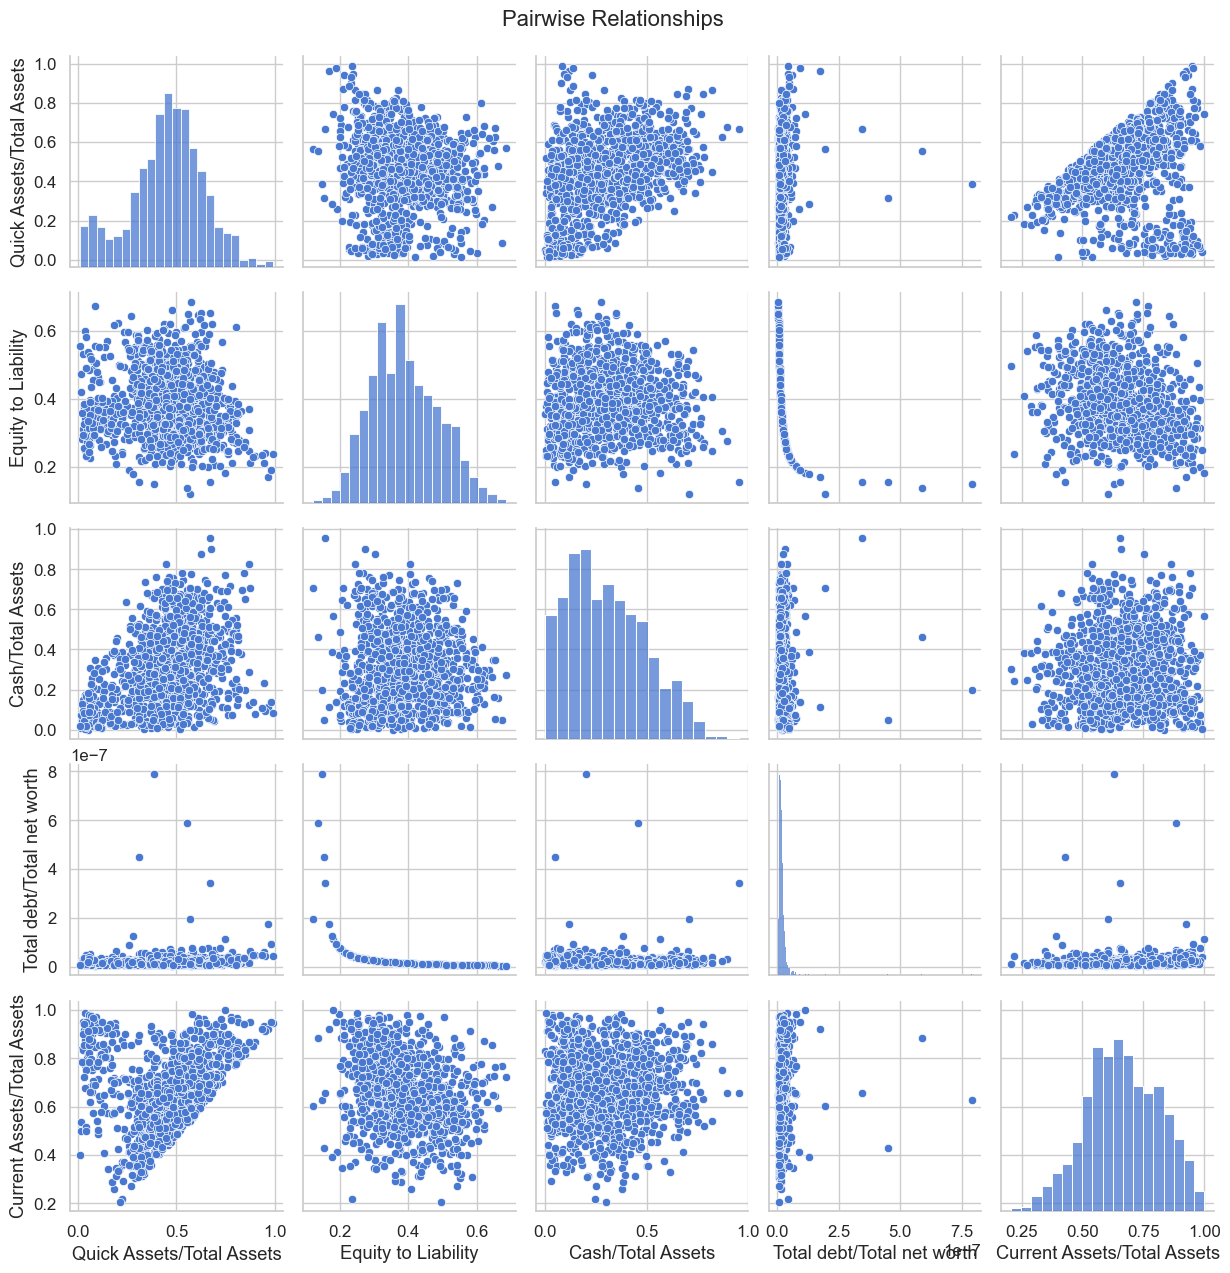

In [198]:
import seaborn as sns

# Set aesthetic style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

# ===== 1. Check for nulls =====
plt.figure(figsize=(10, 4))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# ===== 2. Distribution plots for numeric features =====
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# ===== 3. Correlation heatmap =====
plt.figure(figsize=(14, 10))
corr = dataset[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ===== 4. Boxplots to detect outliers =====
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=dataset[col], color='coral')
    plt.title(f"Boxplot of {col}")
    plt.show()

# ===== 5. Pairplot for key relationships (limit to top features if many) =====
selected_cols = numeric_cols[:5]  # Select top 5 features for sanity
sns.pairplot(dataset[selected_cols])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# ===== 6. Countplot for target variable (assumes 'target' column) =====
if 'target' in dataset.columns:
    plt.figure()
    sns.countplot(x='target', data=dataset, palette='Set2')
    plt.title("Target Variable Distribution")
    plt.show()


In [199]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import joblib
from collections import defaultdict

def get_corr_pairs(df, threshold_low=0.85, threshold_high=0.95): # to get the collinear pairs
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_pairs, pca_pairs = [], []

    for row in upper_tri.index:
        for col in upper_tri.columns:
            corr = upper_tri.loc[row, col] 
            if pd.notna(corr):
                if corr > threshold_high:
                    drop_pairs.append((row, col, corr))
                elif corr > threshold_low:
                    pca_pairs.append((row, col, corr))

    drop_df = pd.DataFrame(drop_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    pca_df = pd.DataFrame(pca_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    return drop_df.sort_values(by='Correlation', ascending=False), pca_df.sort_values(by='Correlation', ascending=False)

def filter_unique_pairs(df_corr): #filtering out the unique pairs so to avoid performing pca with same features
    used, final = set(), []
    for _, row in df_corr.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in used and f2 not in used:
            final.append(row)
            used.update([f1, f2])
    return pd.DataFrame(final)

def apply_drops(df, drop_df, tracked_drops): # dropping one of the feature columns if the collinearity is very high
    df_out = df.copy()
    for _, row in drop_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 in df_out.columns and f2 in df_out.columns:
            tracked_drops.append(f2)
            df_out.drop(columns=[f2], inplace=True)
    return df_out

def apply_pca(df, pairs_df, pca_model_dict): # applying the pca
    df_out = df.copy()
    new_cols = []

    for _, row in pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in df_out.columns or f2 not in df_out.columns:
            continue

        subset = df_out[[f1, f2]].dropna()
        if subset.empty:
            continue

        data = subset.values - subset.values.mean(axis=0)
        pca = PCA(n_components=1).fit(data)
        key = f"{f1}__{f2}"
        pca_model_dict[key] = pca

        new_col = f"PCA_{f1}_{f2}"
        df_out[new_col] = np.nan
        df_out.loc[subset.index, new_col] = pca.transform(data).flatten()
        df_out.drop(columns=[f1, f2], inplace=True)
        new_cols.append(new_col)

    return df_out, new_cols

def hybrid_iterative_reduction(df, thresh_low=0.8, thresh_high=0.95, verbose=False): #doing the process of pca and dropping iteratively until no two features have collinearity higher than the lower threshold (0.8)
    df_iter = df.copy()
    iteration = 1
    all_pca_cols = []
    drop_track = []
    pca_model_dict = defaultdict(PCA)
    all_pca_pairs = []

    while True:
        drop_df, pca_df = get_corr_pairs(df_iter, threshold_low=thresh_low, threshold_high=thresh_high)
        if drop_df.empty and pca_df.empty:
            if verbose:
                print("No more correlated features to process.")
            break

        if verbose:
            print(f"\n--- Iteration {iteration} ---")
            if not drop_df.empty:
                print("Drop Pairs:")
                print(drop_df)
            if not pca_df.empty:
                print("PCA Pairs:")
                print(pca_df)

        if not drop_df.empty:
            df_iter = apply_drops(df_iter, drop_df, drop_track)

        if not pca_df.empty:
            unique_pca_df = filter_unique_pairs(pca_df)
            df_iter, new_pca_cols = apply_pca(df_iter, unique_pca_df, pca_model_dict)
            all_pca_pairs.append(unique_pca_df)
            all_pca_cols.extend(new_pca_cols)

        iteration += 1
        if all_pca_pairs:
            pca_pairs_df = pd.concat(all_pca_pairs, ignore_index=True)
        else:
            pca_pairs_df = pd.DataFrame(columns=["Feature_1", "Feature_2", "Correlation"])

    return df_iter.reset_index(drop=True), all_pca_cols, drop_track, pca_pairs_df, pca_model_dict


final_df, pca_features, dropped_cols, pca_pairs_df, pca_models = hybrid_iterative_reduction(
    dataset,
    thresh_low=0.8,
    thresh_high=0.95,
    verbose=True
)

import os
import joblib

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

# Save all transformation metadata for test/inference
joblib.dump(dropped_cols, 'output/columns_to_drop.pkl')
joblib.dump(pca_pairs_df, 'output/pca_pairs_used.pkl')
joblib.dump(pca_models, 'output/fitted_pca_models.pkl')

print("\n✅ All PCA transformation artifacts saved.")


--- Iteration 1 ---
Drop Pairs:
                             Feature_1                  Feature_2  Correlation
0  Current Liability to Current Assets              Current Ratio     0.973888
1               Cash Flow to Liability  Cash Flow to Total Assets     0.951819
No more correlated features to process.

✅ All PCA transformation artifacts saved.


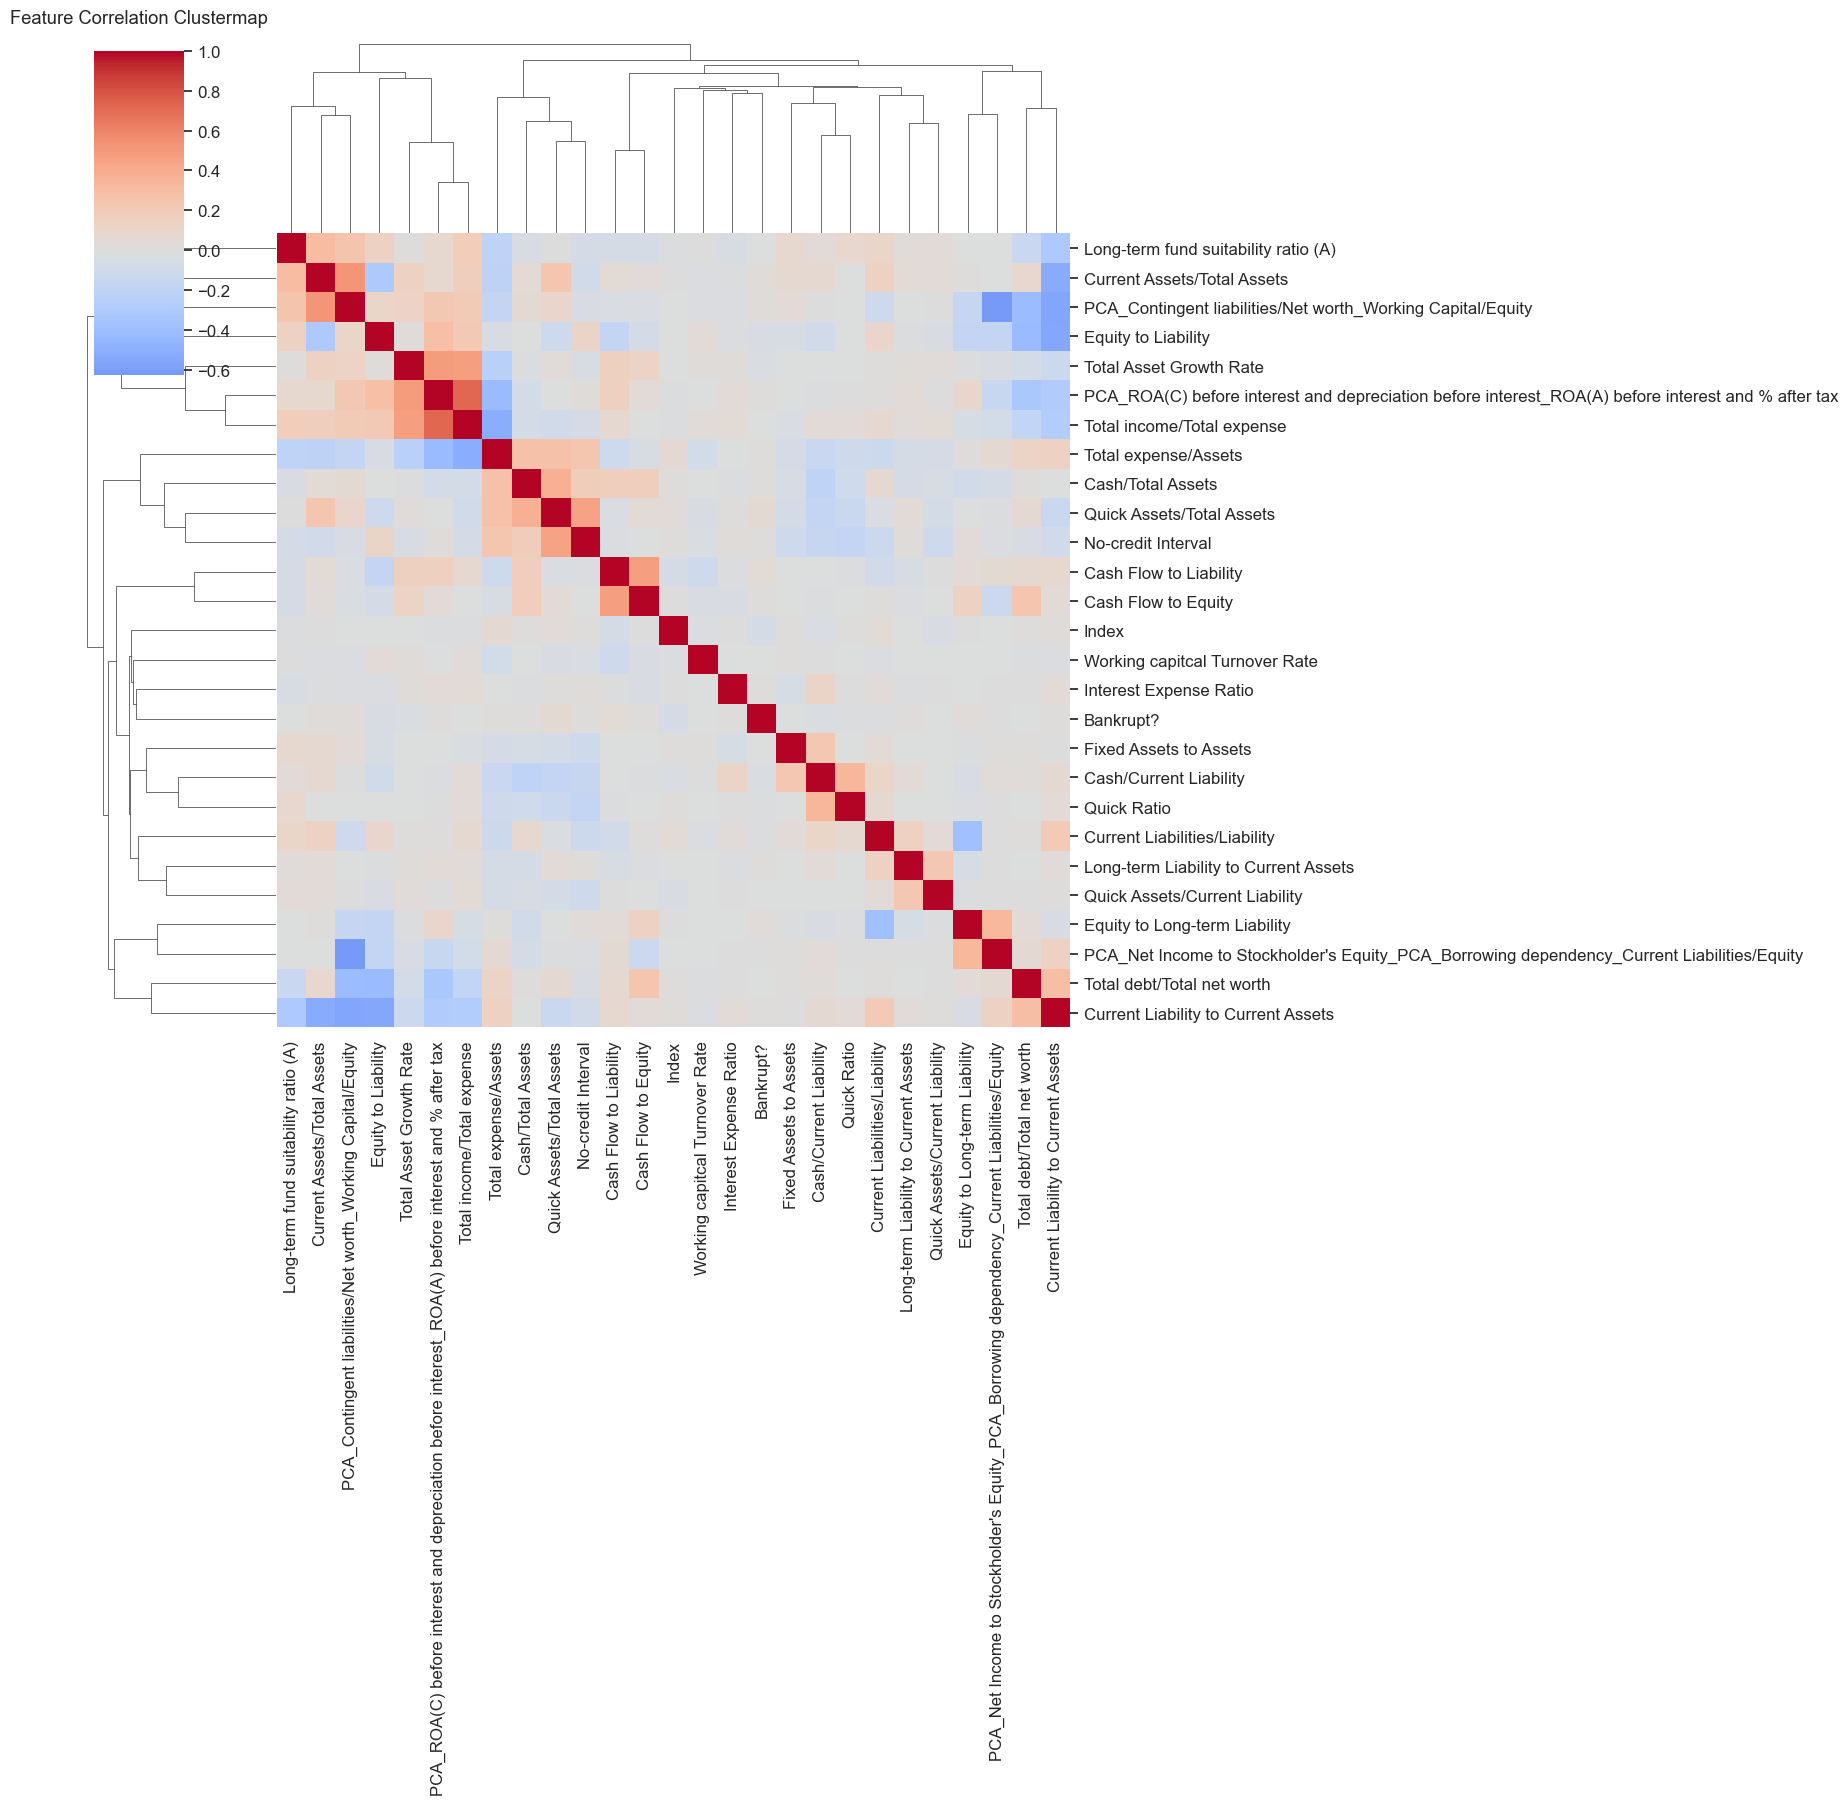

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_matrix = final_df.corr()

sns.clustermap(corr_matrix, cmap="coolwarm", figsize=(18, 18), center=0, xticklabels=True, yticklabels=True)
plt.title("Feature Correlation Clustermap", pad=20)
plt.savefig("plots/correlation_heatmap_pca_applied.png", dpi=300, bbox_inches='tight')

In [201]:
final_df.shape

(1068, 27)

C:\Users\aadit\AppData\Local\Temp\ipykernel_28024\3504842855.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


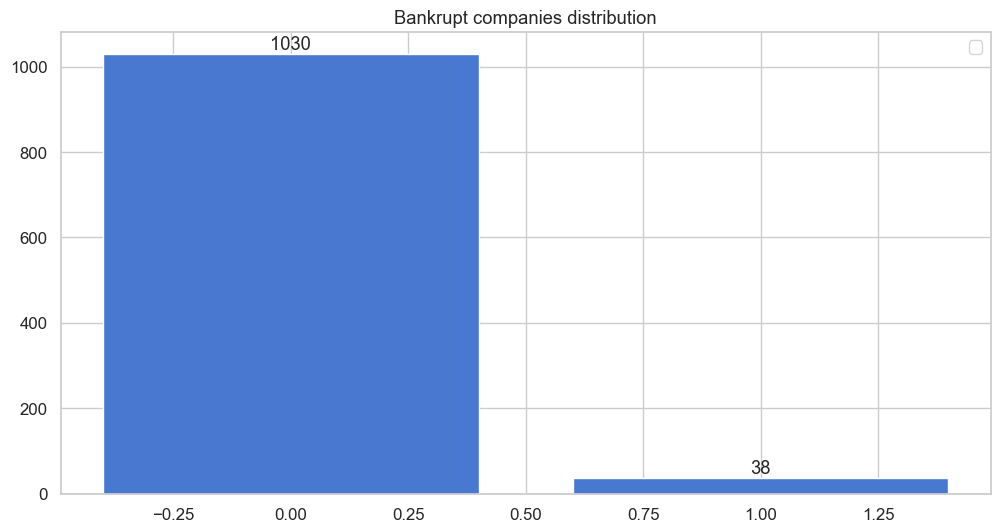

In [202]:
import matplotlib.pyplot as plt

categories=[0,1]
values=[len(dataset[dataset['Bankrupt?']==0]),len(dataset[dataset['Bankrupt?']==1])]
bars = plt.bar(x=categories, height=values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Bankrupt companies distribution")
plt.legend()
plt.show()

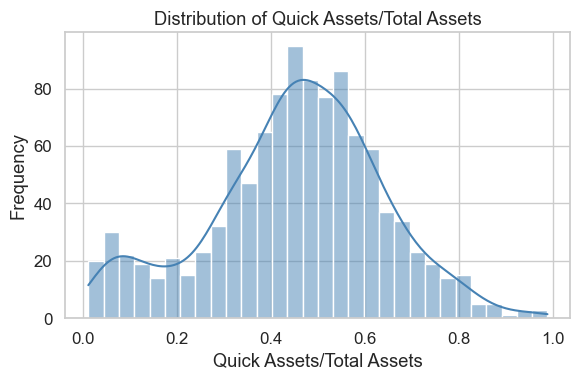

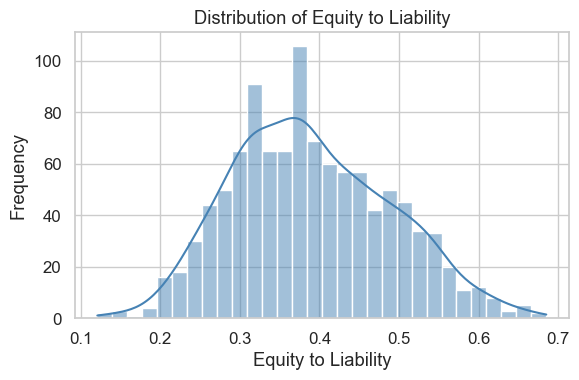

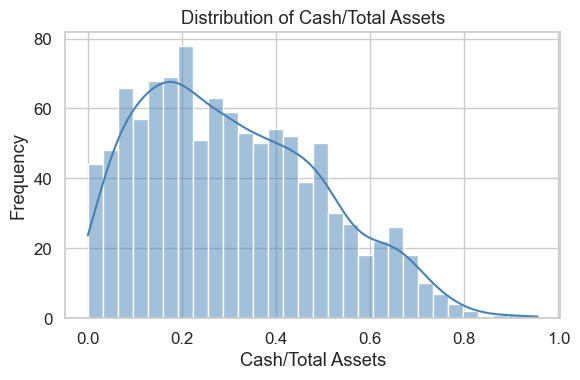

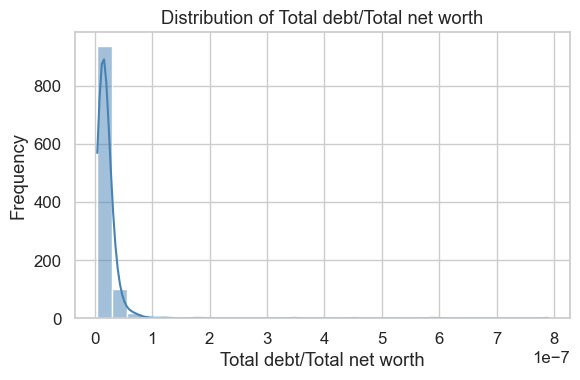

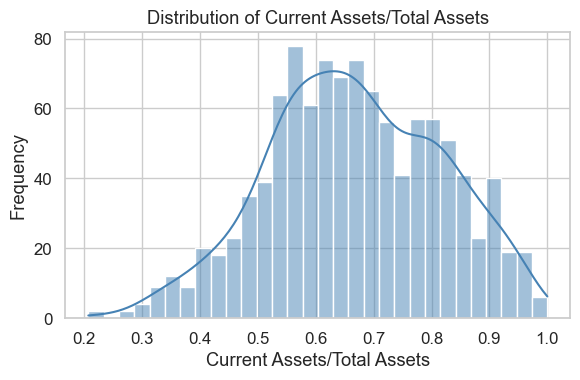

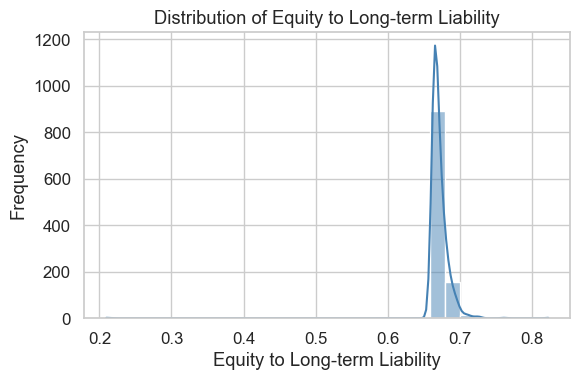

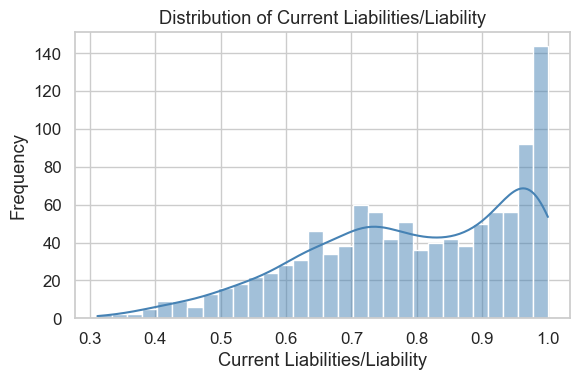

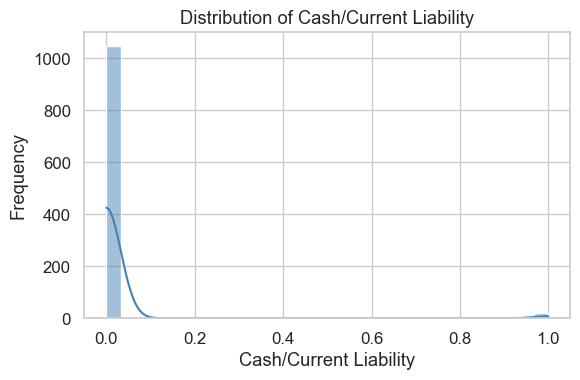

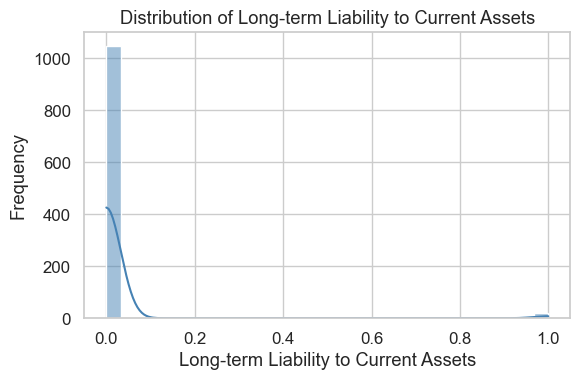

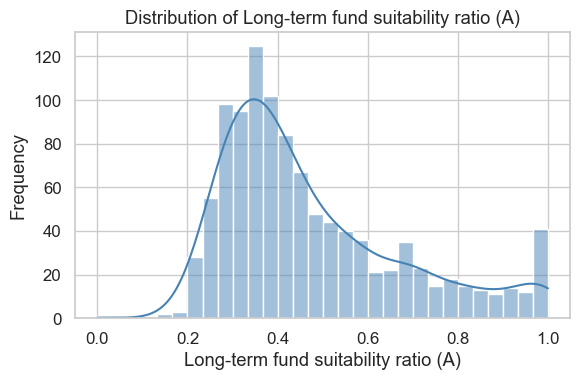

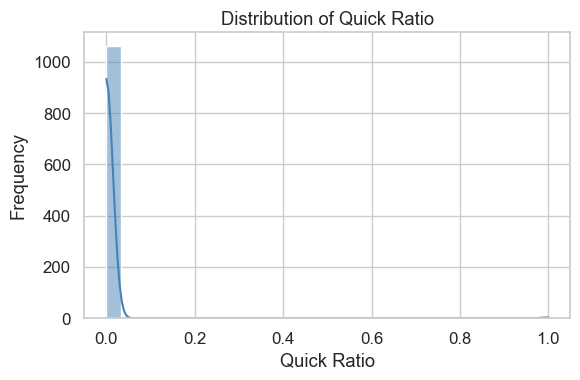

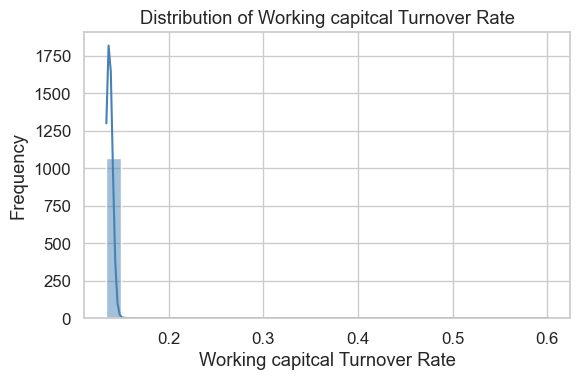

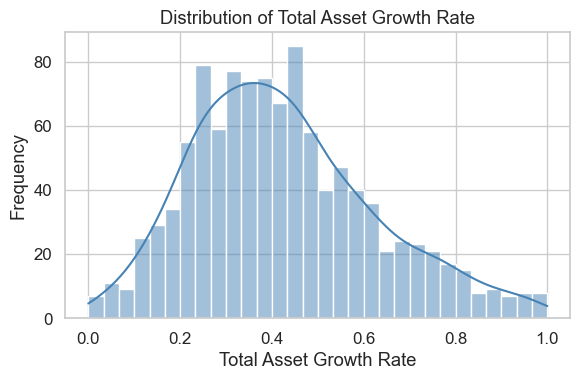

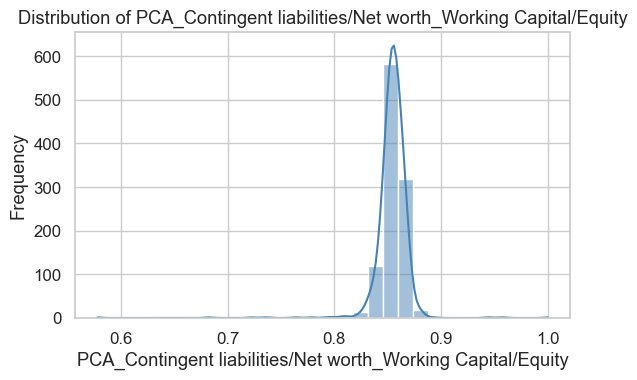

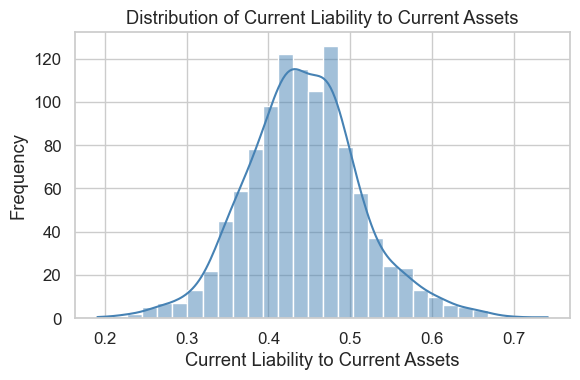

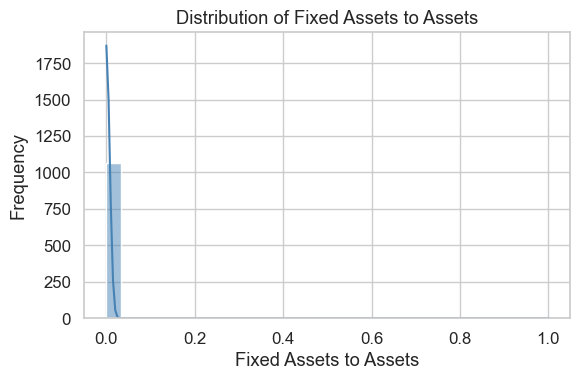

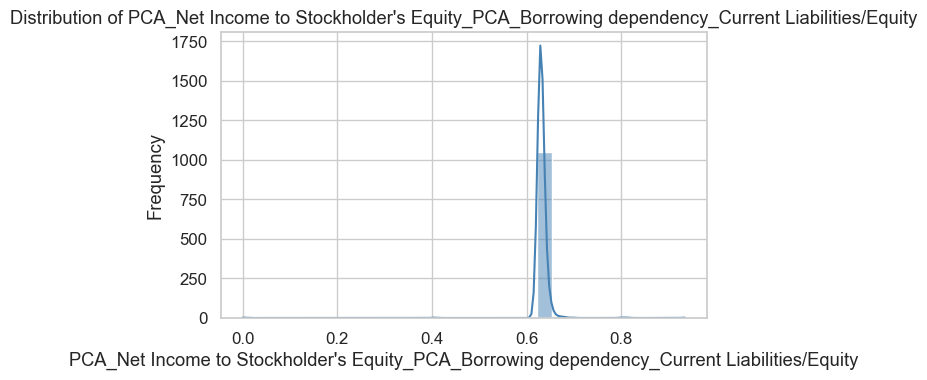

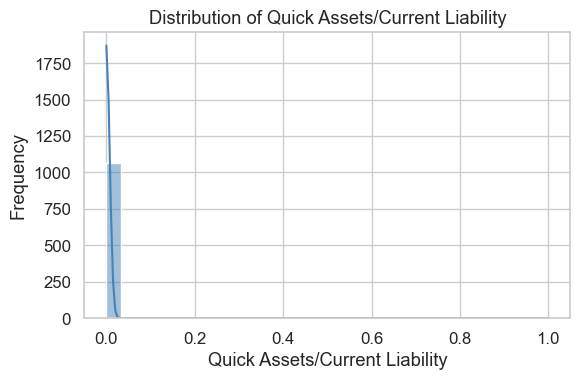

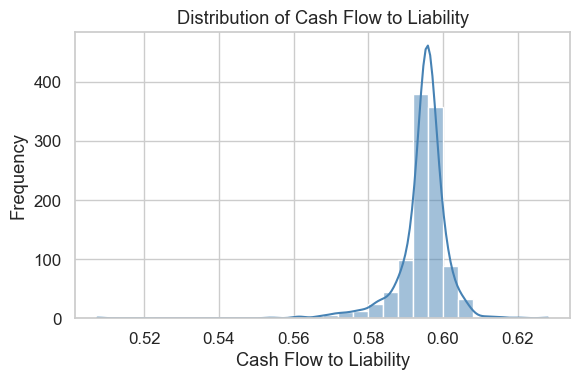

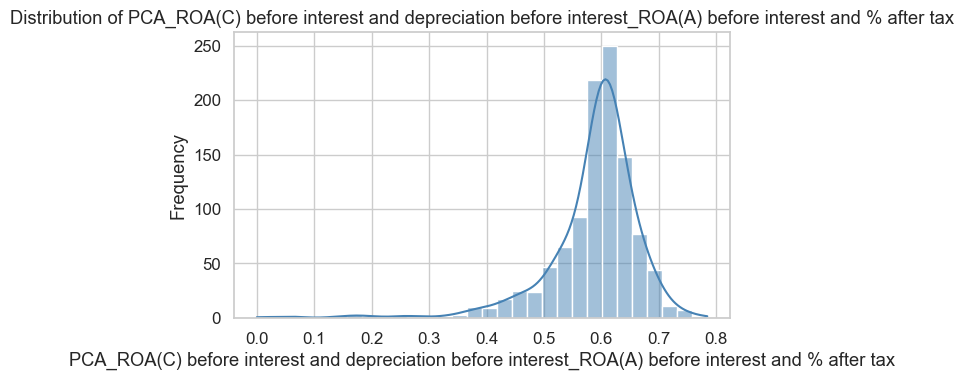

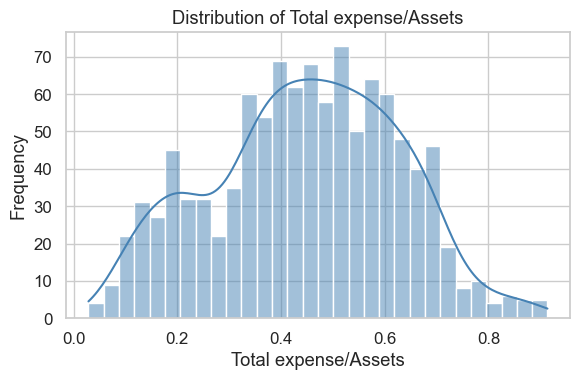

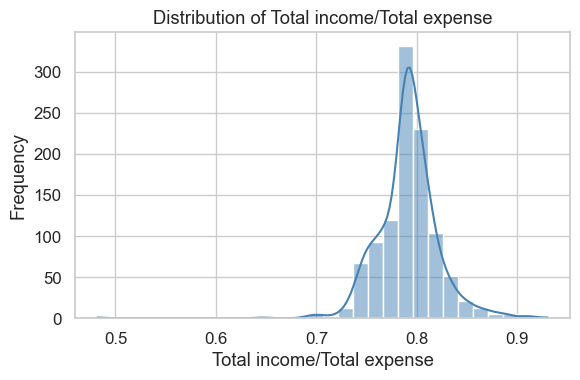

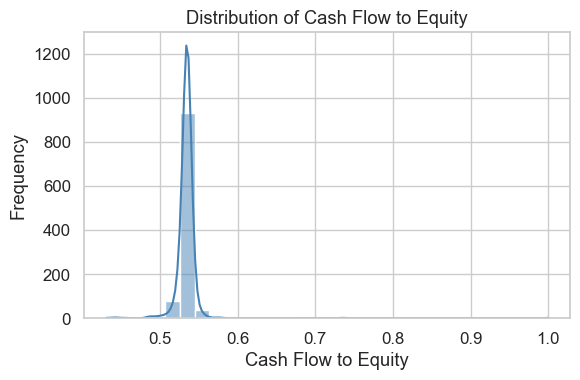

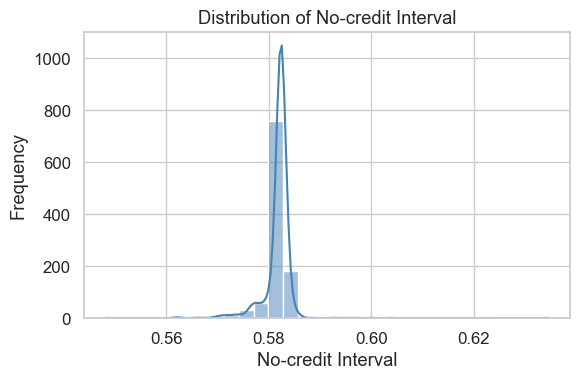

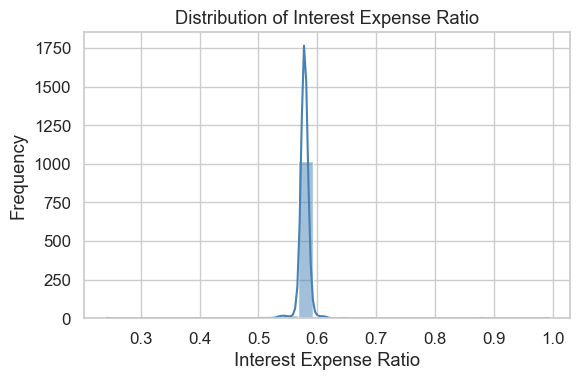

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_distributions(df, max_unique_cats=25, save_fig=False):
    """
    Visualizes distributions of all columns in the DataFrame.
    Numeric: Histogram with KDE
    Categorical: Countplot
    """
    n_cols = 3
    num_cols = df.select_dtypes(include='number').columns
    cat_cols = [col for col in df.columns if col not in num_cols]

    # Plot numeric columns
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        if save_fig:
            plt.savefig(f'distplots/numeric_{col}.png')
        plt.show()

    # Plot categorical columns (only if number of unique categories is manageable)
    for col in cat_cols:
        if df[col].nunique() <= max_unique_cats:
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
            plt.title(f'Category Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            if save_fig:
                plt.savefig(f'distplots/categorical_{col}.png')
            plt.show()
        else:
            print(f"⚠️ Skipping '{col}' due to high cardinality ({df[col].nunique()} unique values)")

# Call the function
visualize_distributions(final_df.iloc[:,:-2])


In [204]:
final_df.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability', 'Cash/Total Assets',
       'Total debt/Total net worth', 'Current Assets/Total Assets',
       'Equity to Long-term Liability', 'Current Liabilities/Liability',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Long-term fund suitability ratio (A)', 'Quick Ratio',
       'Working capitcal Turnover Rate', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Quick Assets/Current Liability', 'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'No-credit Interval', 'Interest Expense Ratio',
       'Index', '

In [205]:
columns_to_drop=['Cash/Current Liability','Long-term Liability to Current Assets','Quick Ratio','Working capitcal Turnover Rate','Fixed Assets to Assets',"PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity",'Quick Assets/Current Liability']
final_df=final_df.drop(columns=columns_to_drop)

In [206]:
final_df.shape

(1068, 20)

In [207]:
X=final_df.drop(columns=['Index','Bankrupt?']).values
y=final_df['Bankrupt?'].values

In [208]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, precision_recall_curve, fbeta_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from collections import Counter
import numpy as np
import pandas as pd

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline: SMOTETomek → Scaler → XGBoost
pipeline = ImbPipeline([
    ('resample', SMOTETomek(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=1,  # Let sampling handle imbalance
        n_jobs=-1,
        random_state=42
    ))
])

# Hyperparameter grid
param_distributions = {
    'clf__n_estimators': randint(300, 600),
    'clf__max_depth': randint(3, 10),
    'clf__learning_rate': uniform(0.01, 0.3),
    'clf__min_child_weight': randint(1, 6),
    'clf__subsample': uniform(0.6, 0.4),
    'clf__colsample_bytree': uniform(0.6, 0.4)
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Search CV
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='average_precision',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit model
search.fit(X_train, y_train)
best_model = search.best_estimator_

# Predict probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Find optimal threshold using F2-score (recall-oriented)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f2_scores = 5 * (precision * recall) / (4 * precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f2_scores)]

# Final prediction
y_pred = (y_proba >= best_threshold).astype(int)

# Reporting
print("\n🔍 Best Hyperparameters:")
print(search.best_params_)
print(f"\n📈 Test Set AUPRC: {average_precision_score(y_test, y_proba):.4f}")
print(f"🎯 Optimal Threshold (F2-max): {best_threshold:.2f}")
print("\n📋 Final Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Resampled class distribution
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X_train, y_train)
print(f"\n⚖️ Class Distribution After SMOTETomek: {Counter(y_resampled)}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\aadit\Anacond


🔍 Best Hyperparameters:
{'clf__colsample_bytree': 0.6915192661966489, 'clf__learning_rate': 0.0330939729486379, 'clf__max_depth': 5, 'clf__min_child_weight': 3, 'clf__n_estimators': 385, 'clf__subsample': 0.9521871356061031}

📈 Test Set AUPRC: 0.0379
🎯 Optimal Threshold (F2-max): 0.00

📋 Final Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.0291    0.0566       206
           1     0.0385    1.0000    0.0741         8

    accuracy                         0.0654       214
   macro avg     0.5192    0.5146    0.0653       214
weighted avg     0.9641    0.0654    0.0573       214

📊 Confusion Matrix:
[[  6 200]
 [  0   8]]

⚖️ Class Distribution After SMOTETomek: Counter({0: 823, 1: 823})


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
